In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import scipy
from scipy import stats
from sklearn import linear_model

from pprint import pprint

# Lab 1

## Task 1

In [2]:
X = np.array([ [i] for i in range(1, 10)])

In [3]:
X1 = np.concatenate((np.ones(X.shape), X), axis=1)
pprint(X1)

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])


In [4]:
X2 = np.concatenate((np.ones(X.shape), X, 1 / X), axis=1)
pprint(X2)

array([[1.        , 1.        , 1.        ],
       [1.        , 2.        , 0.5       ],
       [1.        , 3.        , 0.33333333],
       [1.        , 4.        , 0.25      ],
       [1.        , 5.        , 0.2       ],
       [1.        , 6.        , 0.16666667],
       [1.        , 7.        , 0.14285714],
       [1.        , 8.        , 0.125     ],
       [1.        , 9.        , 0.11111111]])


In [5]:
X3 = np.concatenate((np.ones(X.shape), X ** 2, X ** 3, np.log(X)), axis=1)
pprint(X3)

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 8.00000000e+00, 6.93147181e-01],
       [1.00000000e+00, 9.00000000e+00, 2.70000000e+01, 1.09861229e+00],
       [1.00000000e+00, 1.60000000e+01, 6.40000000e+01, 1.38629436e+00],
       [1.00000000e+00, 2.50000000e+01, 1.25000000e+02, 1.60943791e+00],
       [1.00000000e+00, 3.60000000e+01, 2.16000000e+02, 1.79175947e+00],
       [1.00000000e+00, 4.90000000e+01, 3.43000000e+02, 1.94591015e+00],
       [1.00000000e+00, 6.40000000e+01, 5.12000000e+02, 2.07944154e+00],
       [1.00000000e+00, 8.10000000e+01, 7.29000000e+02, 2.19722458e+00]])


## Task 2

In [6]:
df = pd.read_excel('../data/ls_variants.xls', sheet_name='вар. 15')
df.head()

,x,y
0,0.045826,-31.968642
1,0.046307,-31.649220
2,0.046788,-31.489306
3,0.047269,-31.573924
4,0.047750,-31.187285


In [7]:
x = np.array([df.values[:, 0]]).T
y = np.array([df.values[:, 1]]).T

In [8]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)

In [9]:
n = X.shape[0]
m = X.shape[1]

In [10]:
X[:5, :]

array([[ 1.00000000e+00,  4.58255017e-02,  2.09997661e-03,
         9.62324817e-05,  1.04689171e+00, -3.08291454e+00,
         7.02592014e-01,  7.11592905e-01,  4.40990176e-06,
         3.50921280e-01],
       [ 1.00000000e+00,  4.63065952e-02,  2.14430076e-03,
         9.92952670e-05,  1.04739549e+00, -3.07247088e+00,
         7.08388277e-01,  7.05822959e-01,  4.59802573e-06,
         3.36011237e-01],
       [ 1.00000000e+00,  4.67876886e-02,  2.18908781e-03,
         1.02422359e-04,  1.04789950e+00, -3.06213517e+00,
         7.14137156e-01,  7.00005802e-01,  4.79210542e-06,
         3.21016504e-01],
       [ 1.00000000e+00,  4.72687821e-02,  2.23433776e-03,
         1.05614424e-04,  1.04840376e+00, -3.05190520e+00,
         7.19838268e-01,  6.94141821e-01,  4.99226521e-06,
         3.05940861e-01],
       [ 1.00000000e+00,  4.77498755e-02,  2.28005061e-03,
         1.08872133e-04,  1.04890826e+00, -3.04177882e+00,
         7.25491230e-01,  6.88231411e-01,  5.19863078e-06,
         2.

In [11]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [12]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)

In [13]:
coef = clf.coef_

### Полученная регрессия

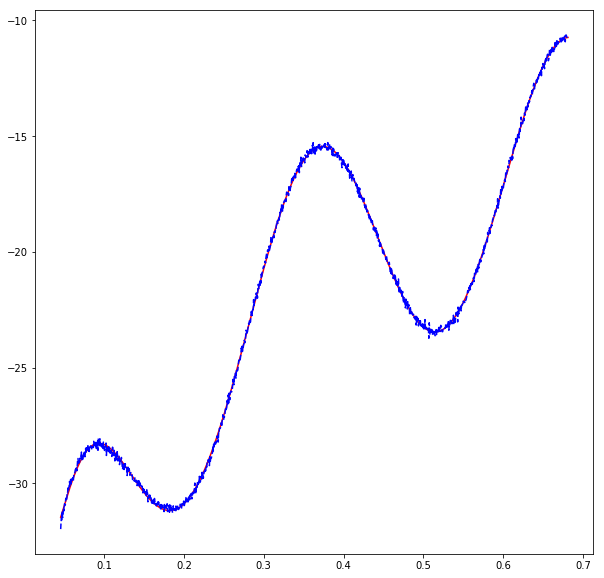

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(x, y_predicted, '-r')
plt.plot(x, y, '--b')
plt.show()

### Остатки ( итог = просто шум)

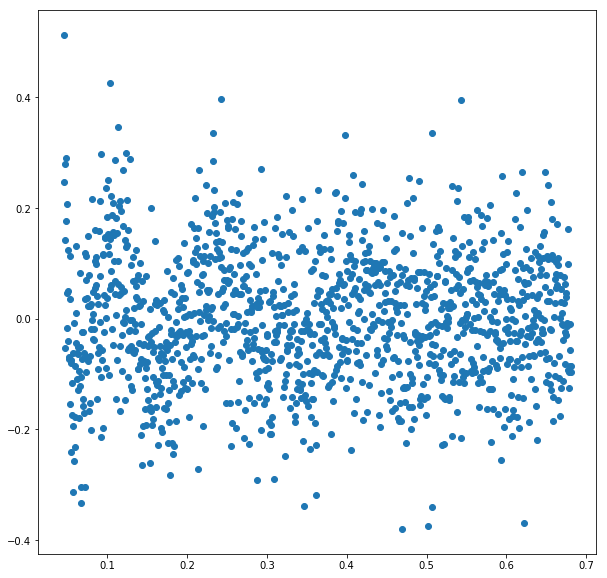

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(x, e_all, 'o')
plt.show()

In [16]:
print(R, S)

0.9996246283579703 18.371034879523094


# Lab 2

## Task 1

### Оценка значимости коэффициентов регрессии по критерию Стюдента

In [17]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)

In [18]:
n = X.shape[0]
m = X.shape[1]

In [19]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [20]:
coef = clf.coef_

### Коэффициенты регрессии

In [21]:
coef.T

array([[-8.56426715e+05],
       [-8.54771980e+05],
       [-4.35879484e+05],
       [-1.23289467e+05],
       [ 8.56250064e+05],
       [-2.81626043e+01],
       [-2.74172793e+00],
       [ 9.86775276e+00],
       [-5.69350741e+04],
       [ 1.46617005e-01]])

In [22]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)
sigma = S / (n - m)

In [23]:
D = sigma * linalg.inv(np.dot(X.T, X))
D = np.diag(D)

In [24]:
from scipy.stats import t
import math
alpha = 0.01
quantile = t.ppf(1 - alpha, n - m)

### Вероятность незначимости коэффициента регрессии

In [25]:
for b, c in zip(coef.flatten(), D):
    t_s = b / np.sqrt(np.abs(c))
    t_s = 2 * (1 - t.cdf(np.abs(t_s), df=n - m))
    print(t_s)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


## Task 2

### Оценка значимости группы факторов по критерию Фишера

In [26]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)
X_P = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3), 
                    np.tan(20 * x), np.log(10 * x)), axis=1)

In [27]:
n = X.shape[0]
m = X.shape[1]

n_p = X_P.shape[0]
m_p = X_P.shape[1]

In [28]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [29]:
coef = clf.coef_

### Коэффициенты регрессии

In [30]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

clf_p = linear_model.LinearRegression(fit_intercept=False)
clf_p.fit(X_P, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [31]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)
sigma = S / (n - m)

In [32]:
y_predicted_p = clf_p.predict(X_P) 
e_all_p = y_predicted_p - y
S_p = np.sum(e_all_p * e_all_p)
R_p = 1 - np.sum(e_all_p * e_all_p) / np.sum((y - np.mean(y)) ** 2)
sigma_p = S_p / (n - m)

In [33]:
F = (S - S_p) / (m_p - m) * S_p / (n - m)

In [34]:
from scipy.stats import f
import math
alpha = 0.01

### Вероятность незначимости коэффициента регрессии

In [35]:
F_S = f.ppf(1 - alpha, dfn=m_p-m, dfd=m)

In [36]:
print('Статистика {F_S} < {F}'.format(F=F_S, F_S=F))

Статистика 3.1587060565104555e-05 < 7.559432157547899


### Гипотеза о незначимости новых факторов не отвергается, значит построим доверительный интервал

## Task 3

### Совместная доверительная область

In [37]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)

In [38]:
n = X.shape[0]
m = X.shape[1]

In [39]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [40]:
coef = clf.coef_

### Коэффициенты регрессии

In [41]:
coef.T

array([[-8.56426715e+05],
       [-8.54771980e+05],
       [-4.35879484e+05],
       [-1.23289467e+05],
       [ 8.56250064e+05],
       [-2.81626043e+01],
       [-2.74172793e+00],
       [ 9.86775276e+00],
       [-5.69350741e+04],
       [ 1.46617005e-01]])

In [42]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)
sigma = S / (n - m)

In [43]:
D = sigma * linalg.inv(np.dot(X.T, X))
A = D[0:2, 0:2]
p = np.linspace(0, 2 * np.pi, 1000)
k = len(p)
z = np.column_stack((np.cos(p), np.sin(p))).T
alpha = 0.01

In [44]:
quantile_t = np.sqrt(f.ppf(1 - alpha, 2, n - m))

In [45]:
B = linalg.cholesky(A)

In [46]:
coords = np.zeros((k, 2))

In [47]:
for index in range(k):
    result = quantile_t * np.dot(B.T, z[:, index])
    coords[index, :] = result + coef[0, :2]

In [48]:
quantile = t.ppf(1 - alpha, n - m) * np.sqrt(np.diag(A));

In [49]:
betta = np.array([[coef[0, 0] - quantile[0],
                  coef[0, 0] - quantile[0], 
                  coef[0, 0] + quantile[0], 
                  coef[0, 0] + quantile[0], 
                  coef[0, 0] - quantile[0]], 
                 [coef[0, 1] - quantile[1], 
                  coef[0, 1] + quantile[1], 
                  coef[0, 1] + quantile[1], 
                  coef[0, 1] - quantile[1], 
                  coef[0, 1] - quantile[1]]])

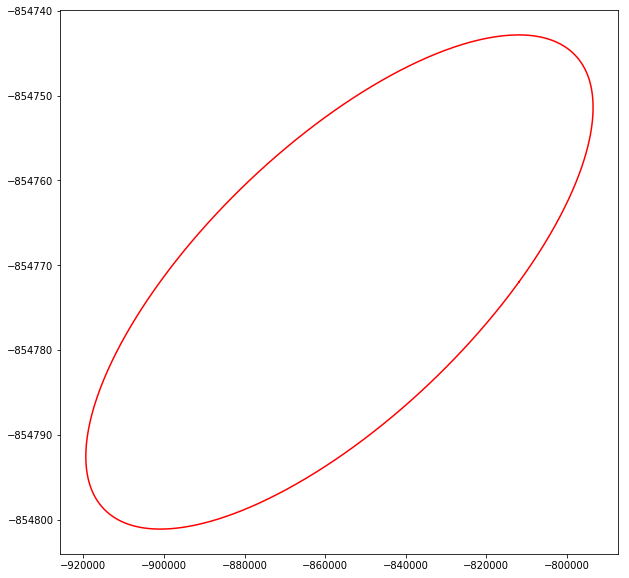

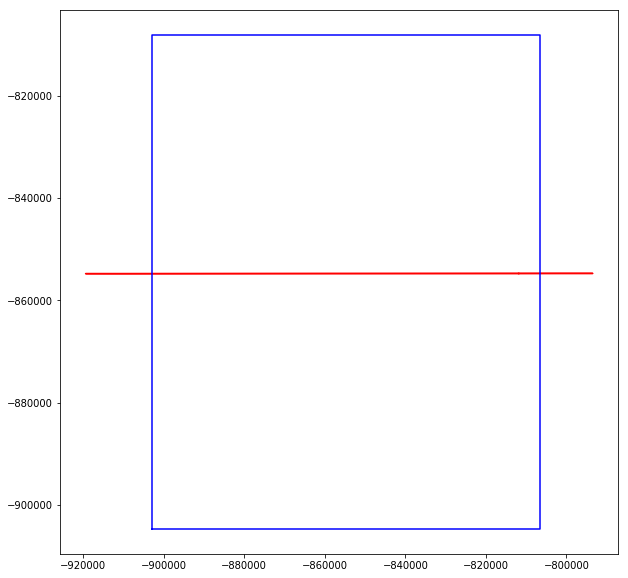

In [50]:
plt.figure(figsize=(10, 10))
plt.plot(coords[:, 0], coords[:, 1], 'r')
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(coords[:, 0], coords[:, 1], 'r')
plt.plot(betta[1, :], betta[0, :], 'b')

plt.show()

## Task 4

### Доверительные интервалы для коэффициентов регрессии

In [51]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)

In [52]:
n = X.shape[0]
m = X.shape[1]

In [53]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [54]:
coef = clf.coef_

### Коэффициенты регрессии

In [55]:
coef.T

array([[-8.56426715e+05],
       [-8.54771980e+05],
       [-4.35879484e+05],
       [-1.23289467e+05],
       [ 8.56250064e+05],
       [-2.81626043e+01],
       [-2.74172793e+00],
       [ 9.86775276e+00],
       [-5.69350741e+04],
       [ 1.46617005e-01]])

In [56]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)
sigma = S / (n - m)

In [57]:
D = sigma * linalg.inv(np.dot(X.T, X))
D = np.array([np.diag(D)])

In [58]:
from scipy.stats import t
import math
alpha = 0.05
dj = t.ppf(1 - alpha / 2, df=n-m) * np.sqrt(D.T)

In [59]:
confidence_interval = np.column_stack((coef.T - dj, coef.T + dj))

#### Доверительные интервалы для каждого коэффициента регрессии

In [60]:
confidence_interval

array([[-8.97094937e+05, -8.15758494e+05],
       [-8.95380823e+05, -8.14163137e+05],
       [-4.56475327e+05, -4.15283641e+05],
       [-1.29362309e+05, -1.17216624e+05],
       [ 8.15588729e+05,  8.96911398e+05],
       [-3.00786280e+01, -2.62465806e+01],
       [-2.83440395e+00, -2.64905190e+00],
       [ 9.80592092e+00,  9.92958461e+00],
       [-5.94914582e+04, -5.43786900e+04],
       [ 1.34672814e-01,  1.58561196e-01]])

#### Коэффициенты регрессии

In [61]:
coef.T

array([[-8.56426715e+05],
       [-8.54771980e+05],
       [-4.35879484e+05],
       [-1.23289467e+05],
       [ 8.56250064e+05],
       [-2.81626043e+01],
       [-2.74172793e+00],
       [ 9.86775276e+00],
       [-5.69350741e+04],
       [ 1.46617005e-01]])

In [62]:
coef_rounded = np.array([ [-9 * 1e+5, 
                           -9 * 1e+5, 
                           -4 * 1e+5, 
                           -1 * 1e+5, 
                           9 * 1e+5, 
                           -3 * 1e+1, 
                           -3 * 1e+0, 
                           10 * 1e+0, 
                           -6 * 1e+4, 
                           1 * 1e-1] ])

In [63]:
confidence_interval_rounded = np.column_stack((coef_rounded.T - dj, coef_rounded.T + dj))

In [64]:
confidence_interval_rounded

array([[-9.40668221e+05, -8.59331779e+05],
       [-9.40608843e+05, -8.59391157e+05],
       [-4.20595843e+05, -3.79404157e+05],
       [-1.06072842e+05, -9.39271577e+04],
       [ 8.59338665e+05,  9.40661335e+05],
       [-3.19160237e+01, -2.80839763e+01],
       [-3.09267603e+00, -2.90732397e+00],
       [ 9.93816816e+00,  1.00618318e+01],
       [-6.25563841e+04, -5.74436159e+04],
       [ 8.80558089e-02,  1.11944191e-01]])

In [65]:
np.round(confidence_interval_rounded, 1)

array([[-9.406682e+05, -8.593318e+05],
       [-9.406088e+05, -8.593912e+05],
       [-4.205958e+05, -3.794042e+05],
       [-1.060728e+05, -9.392720e+04],
       [ 8.593387e+05,  9.406613e+05],
       [-3.190000e+01, -2.810000e+01],
       [-3.100000e+00, -2.900000e+00],
       [ 9.900000e+00,  1.010000e+01],
       [-6.255640e+04, -5.744360e+04],
       [ 1.000000e-01,  1.000000e-01]])

#### Разница до и после округления с изначально найдеными коэффициентами регрессии

num = 1


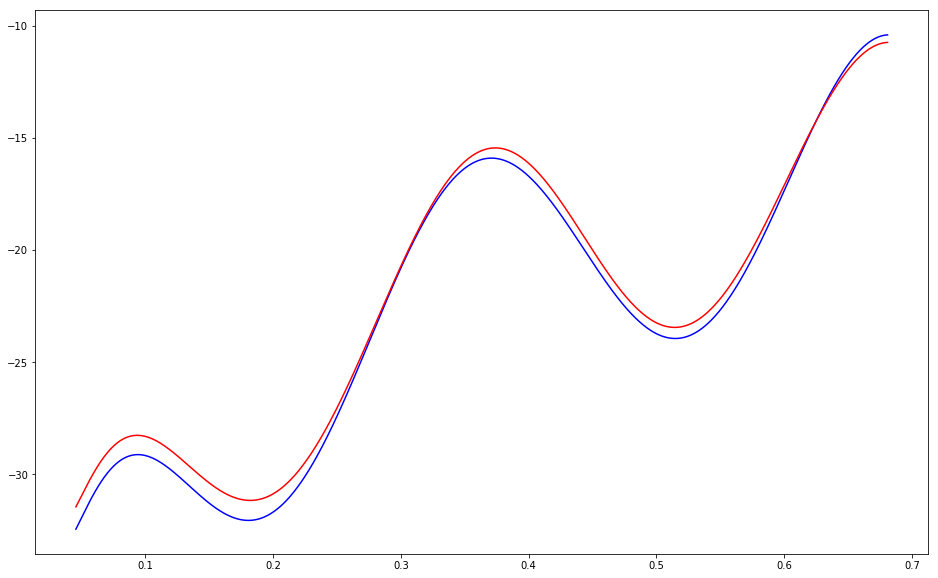

num = 2


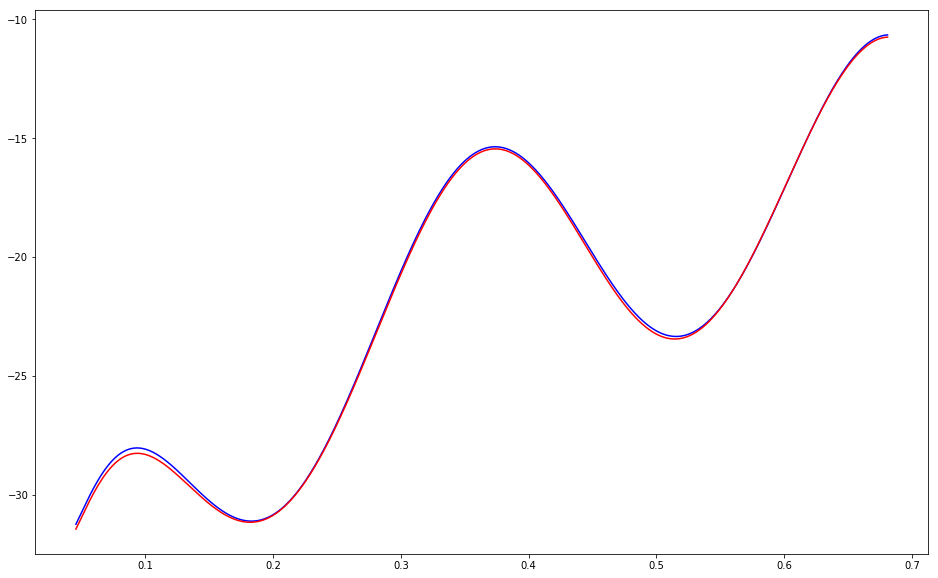

num = 3


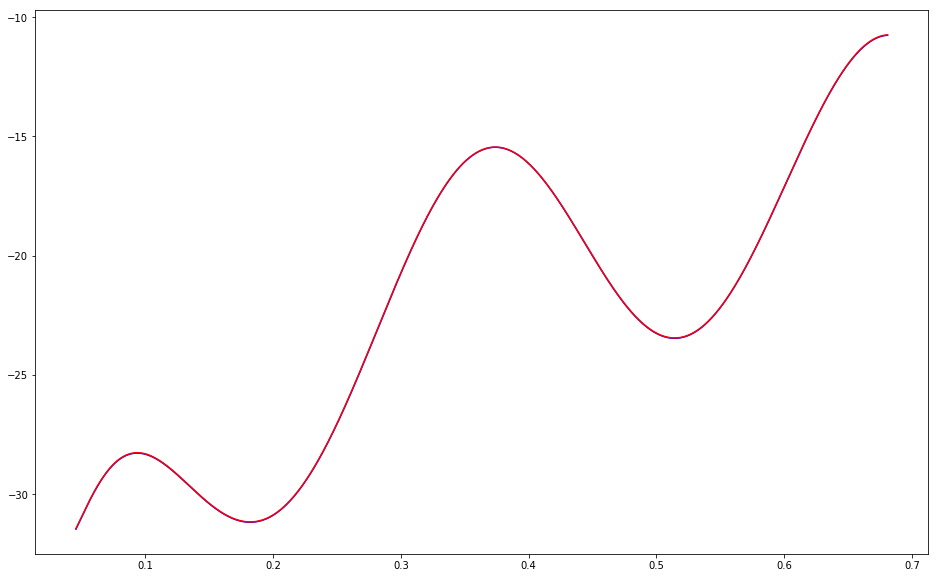

num = 4


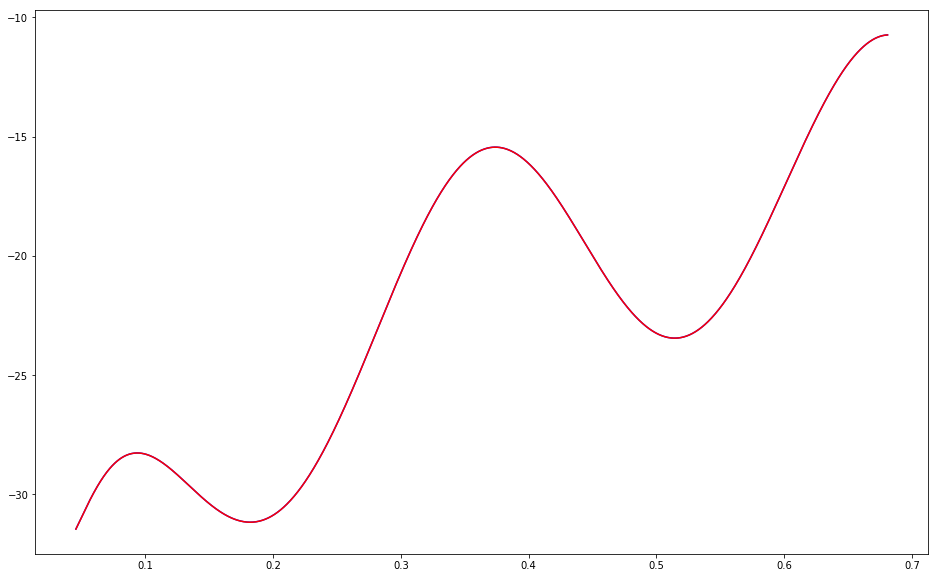

num = 5


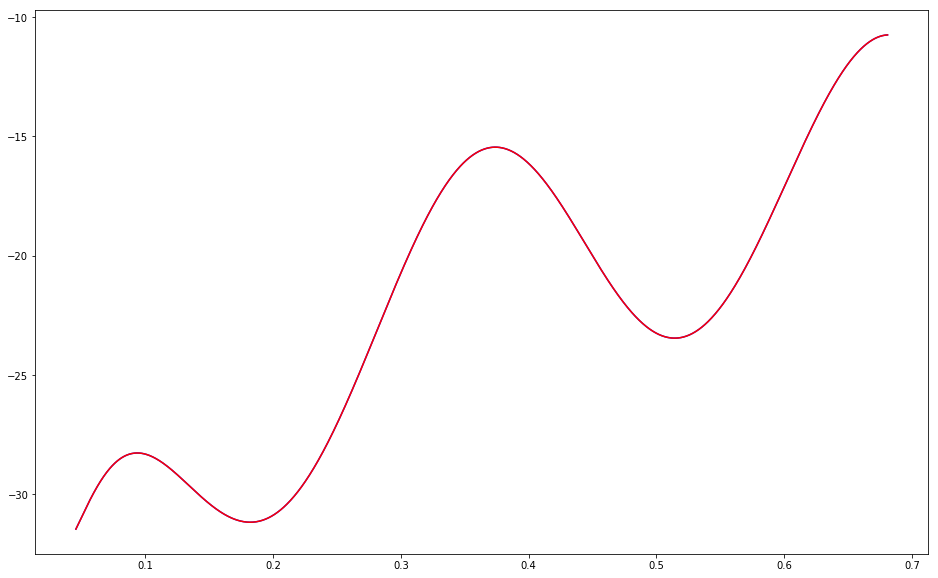

num = 6


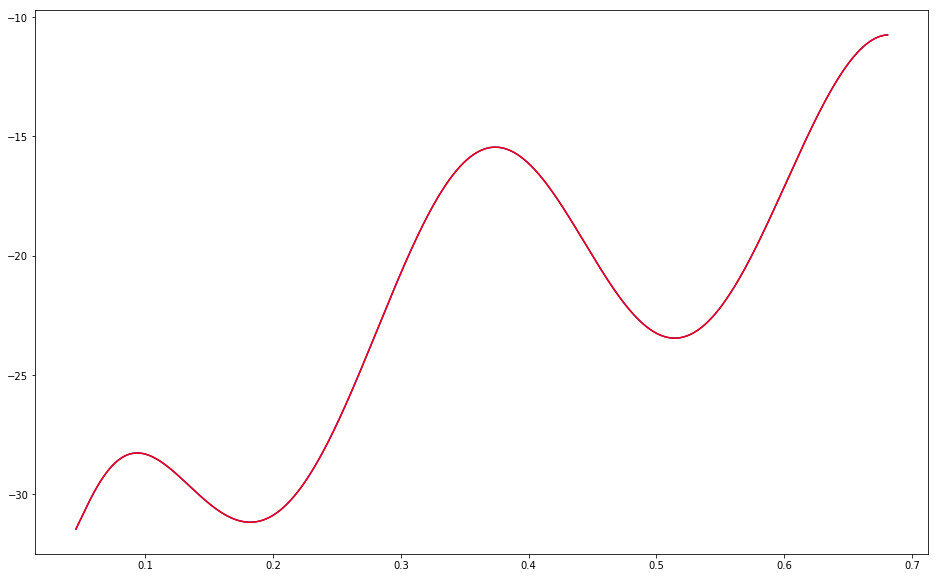

num = 7


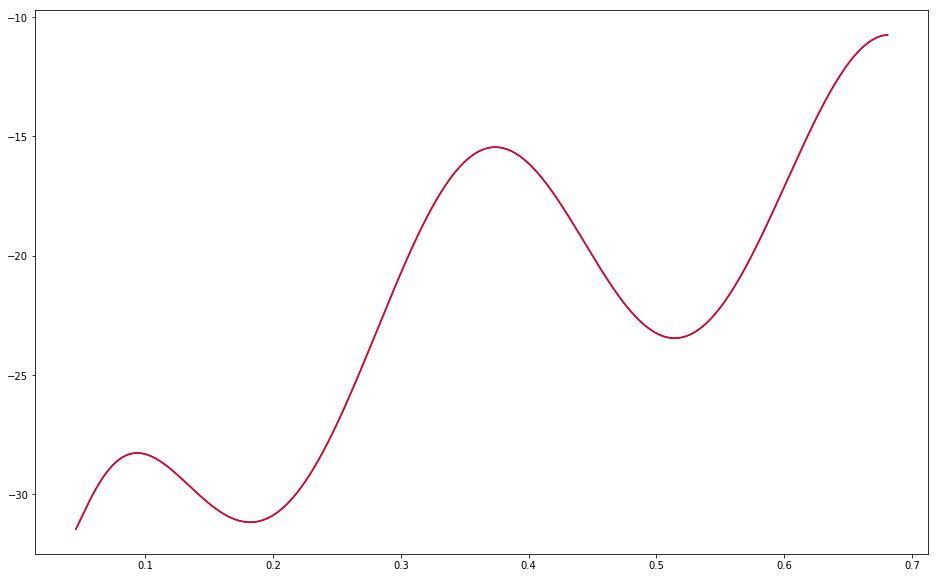

num = 8


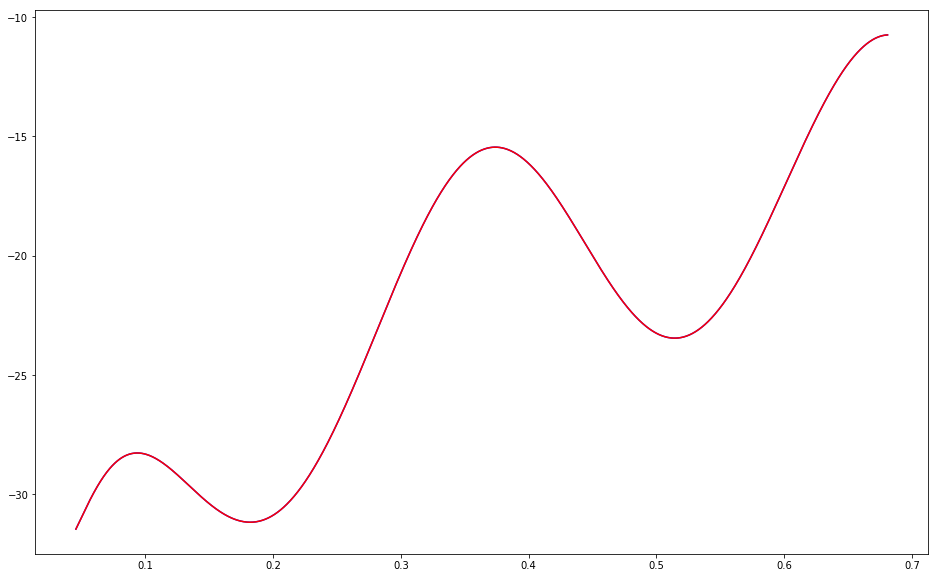

num = 9


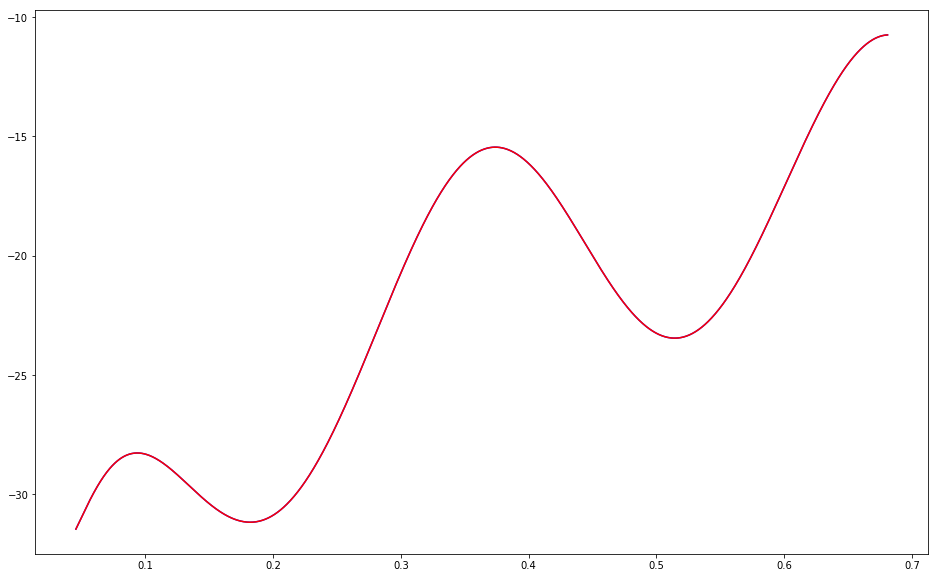

num = 10


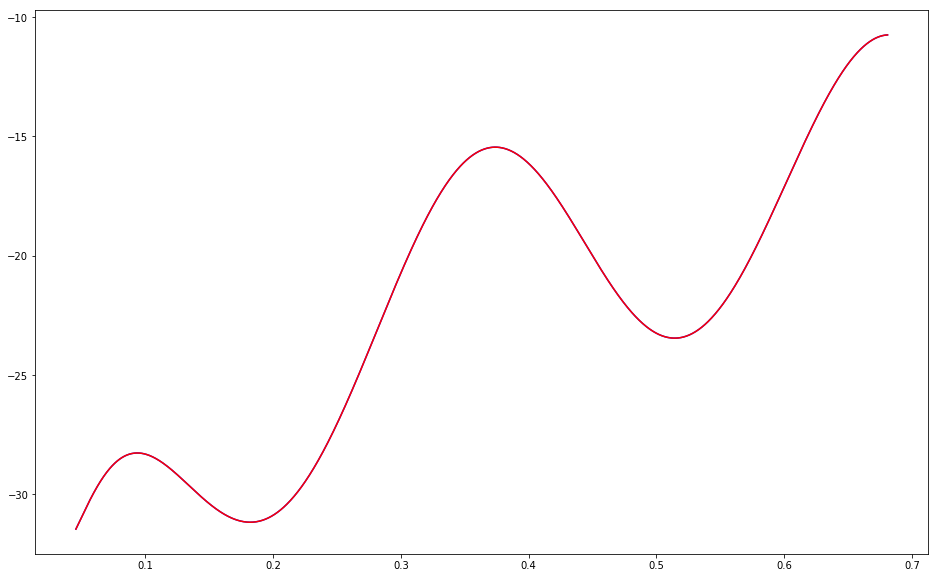

num = 11


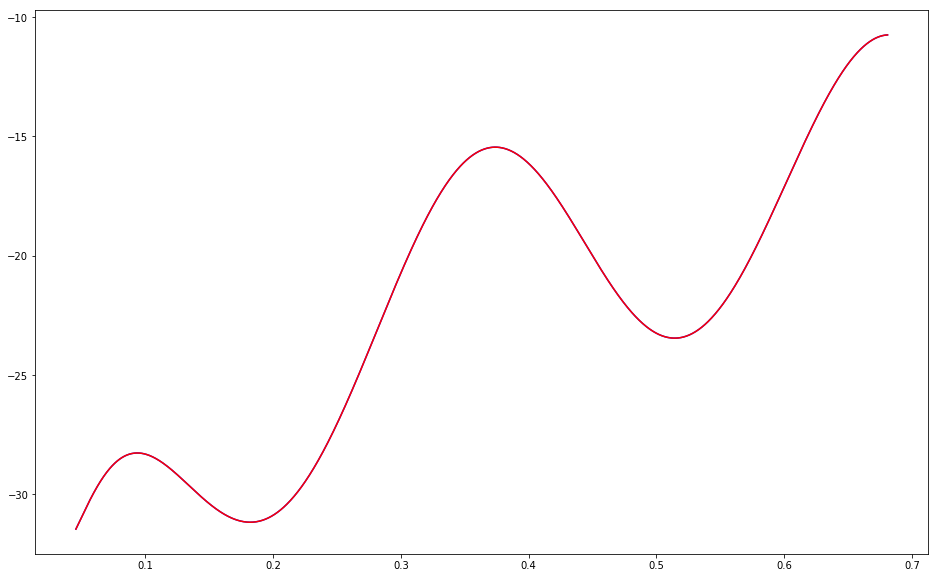

num = 12


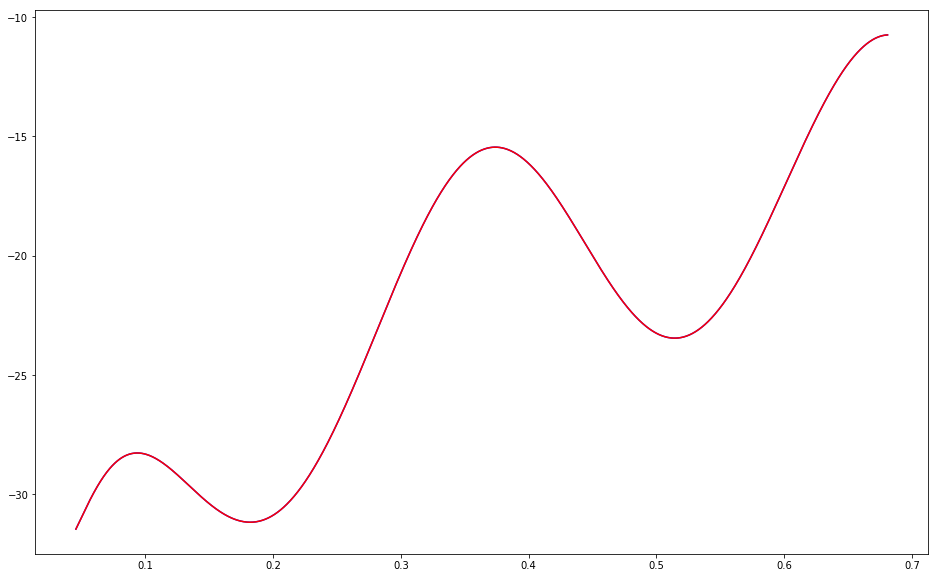

In [66]:
for num in range(12):
    coef_temp = np.round(coef, num)
    clf.coef_ = coef_temp
    
    y_predicted_t = clf.predict(X)
    
    print('num = {num}'.format(num=num + 1))
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y_predicted_t, 'b')
    plt.plot(x, y_predicted, 'r')
    plt.show()

#### Можно округлить до 3+ знаков после запятой(!)

## Task 5

### Доверительные полосы для прогноза и отклика модели

In [67]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)

In [68]:
n = X.shape[0]
m = X.shape[1]

In [69]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [70]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)
sigma = S / (n - m)

In [71]:
L = linalg.inv(np.dot(X.T, X))

#### Расчет точек для построения доверительной полосы отклика

In [72]:
XL_L = []
XL_R = []

for row_index in range(X.shape[0]):
    row = X[row_index, :]
    y_p = y_predicted[row_index]
    
    p = np.dot(row.T, L)
    p = np.dot(p, row)
    
    XL_R.append(y_p + np.sqrt(p * sigma) * t.ppf(1 - alpha / 2, df=n-m))
    XL_L.append(y_p - np.sqrt(p * sigma) * t.ppf(1 - alpha / 2, df=n-m))    

#### Расчет точек для построения доверительной полосы прогноза

In [73]:
_XL_L = []
_XL_R = []

for row_index in range(X.shape[0]):
    row = X[row_index, :]
    y_p = y_predicted[row_index]
    
    p = np.dot(row.T, L)
    p = np.dot(p, row)
    
    _XL_R.append(y_p + np.sqrt((p + 1) * sigma) * t.ppf(1 - alpha / 2, df=n-m))
    _XL_L.append(y_p - np.sqrt((p + 1) * sigma) * t.ppf(1 - alpha / 2, df=n-m))    

#### Доверительная полоса прогноза

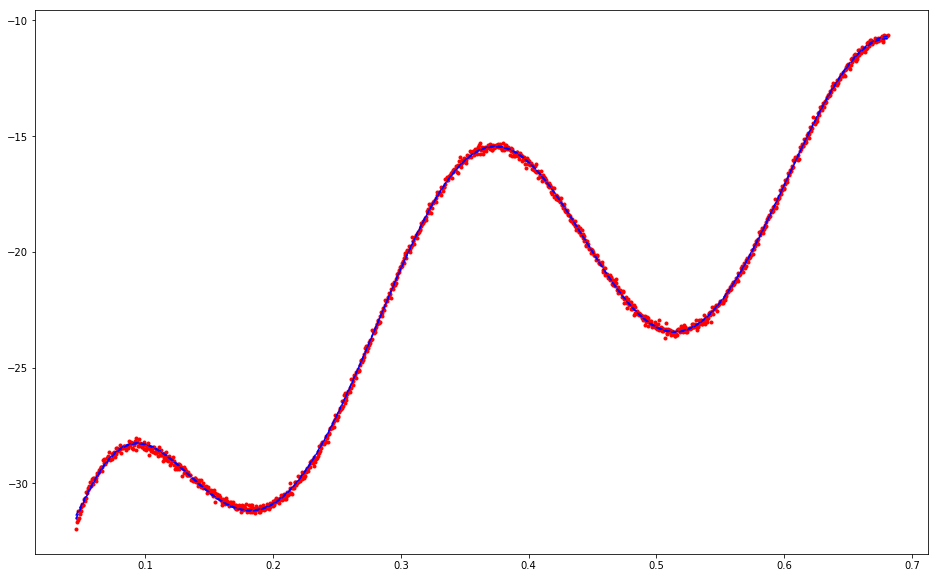

In [74]:
plt.figure(figsize=(16, 10))
plt.plot(x, y, '.r')
plt.plot(x, XL_L, '--b')
plt.plot(x, XL_R, '--b')
plt.show()

#### Доверительная полоса отклика

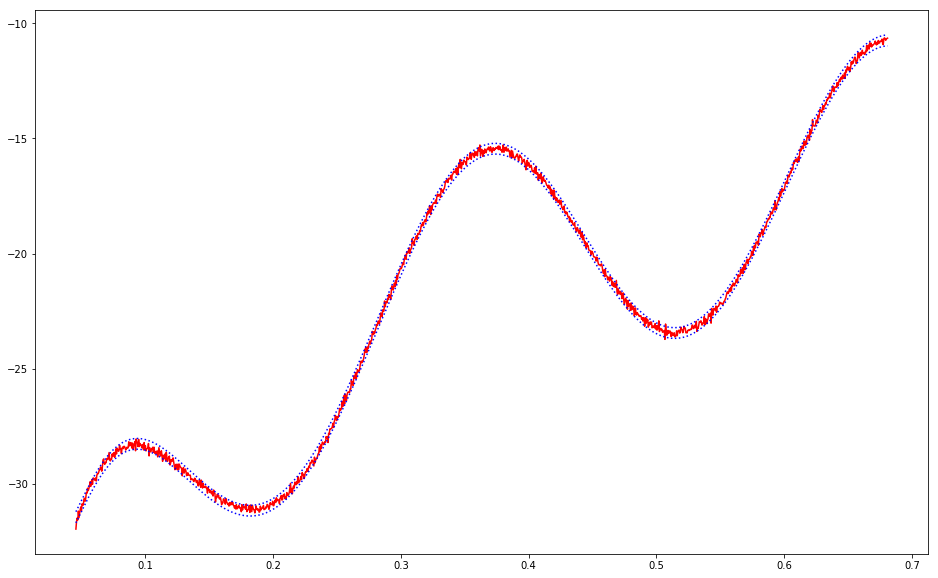

In [75]:
plt.figure(figsize=(16, 10))
plt.plot(x, y, 'r')
plt.plot(x, _XL_L, ':b')
plt.plot(x, _XL_R, ':b')
plt.show()

#### Совместный график

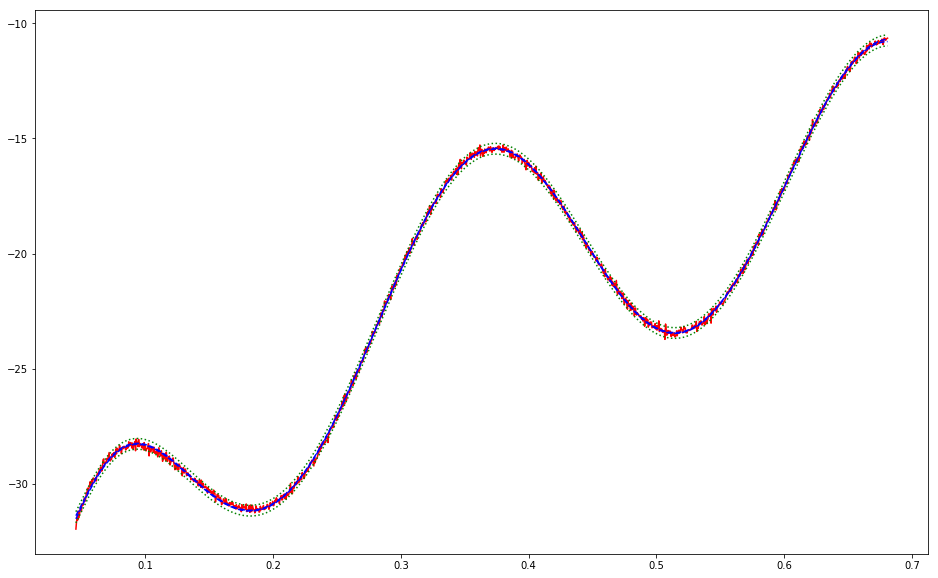

In [76]:
plt.figure(figsize=(16, 10))
plt.plot(x, y, 'r')
plt.plot(x, XL_L, '--b')
plt.plot(x, XL_R, '--b')
plt.plot(x, _XL_L, ':g')
plt.plot(x, _XL_R, ':g')
plt.show()

## Lab 3

### Task 1

In [77]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)

In [78]:
n = X.shape[0]
m = X.shape[1]

In [79]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [80]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)
sigma = S / (n - m)
errors = e_all[:, 0]

errors = np.sort(errors)
normed_errors = (np.mean(errors) - errors) / np.std(errors)

norm = np.sort(np.random.normal(size=normed_errors.shape[0]))

In [81]:
# Декомпозиция выборки на groups_count выборок
def un_group(array, groups_count):
    assert len(array) % groups_count == 0
    
    groups = list()
    group_size = len(array) // groups_count
    for k in range(groups_count):
        groups.append(array[k * group_size: (k + 1) * group_size])

    return groups

In [82]:
errors = e_all[:1300, 0]
grouped_errors = un_group(errors, 10)
statistic, p_value = scipy.stats.f_oneway(*grouped_errors)

In [83]:
print('Значение статистики: {stat}, p_value: {p_value}'.format(stat=statistic, p_value=p_value))

Значение статистики: 2.9880997380081564, p_value: 0.0015746835010985436


p_value - имеет значение меньшее, чем 0.01, следовательно гипотеза о постоянстве математического ожидания не отвергается

#### Plot остатков

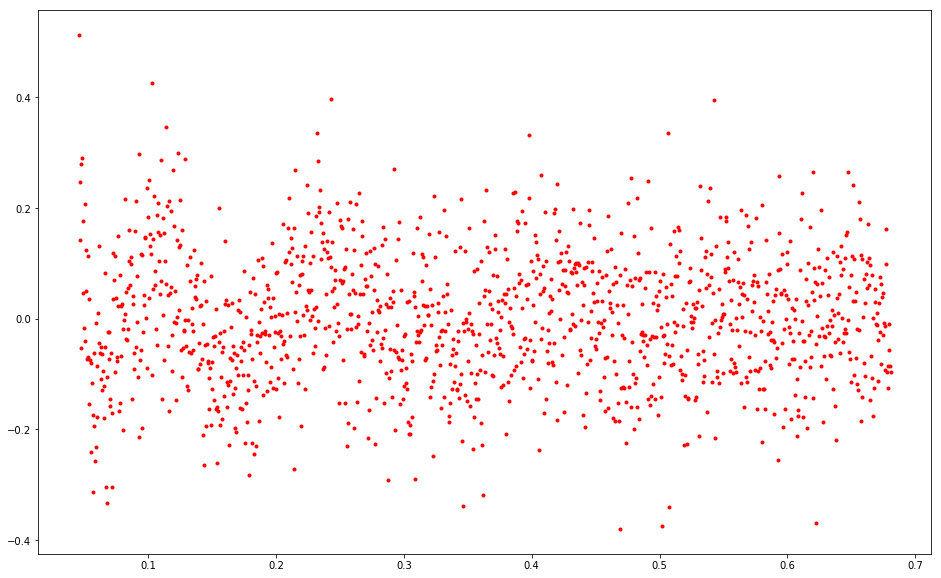

In [84]:
plt.figure(figsize=(16, 10))
plt.plot(x, e_all, '.r')
plt.show()

#### Boxplot средних из дисперсионного анализа ANOVA

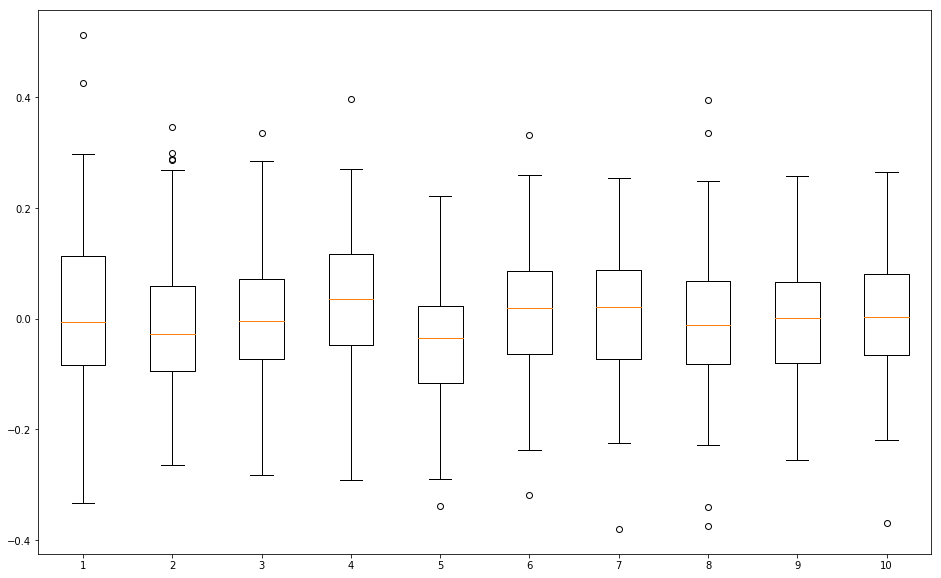

In [85]:
plt.figure(figsize=(16, 10))
ans = plt.boxplot(grouped_errors)

### Task 2

In [86]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)

In [87]:
n = X.shape[0]
m = X.shape[1]

In [88]:
clf = linear_model.LinearRegression(fit_intercept=False)
_ = clf.fit(X, y)

In [89]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
e_all_squared = e_all * e_all
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)
sigma = S / (n - m)

# errors = e_all[:, 0]
# errors = np.sort(errors)
# normed_errors = (np.mean(errors) - errors) / np.std(errors)
# norm = np.sort(np.random.normal(size=normed_errors.shape[0]))

#### Plot  для  $ e_i^2 $

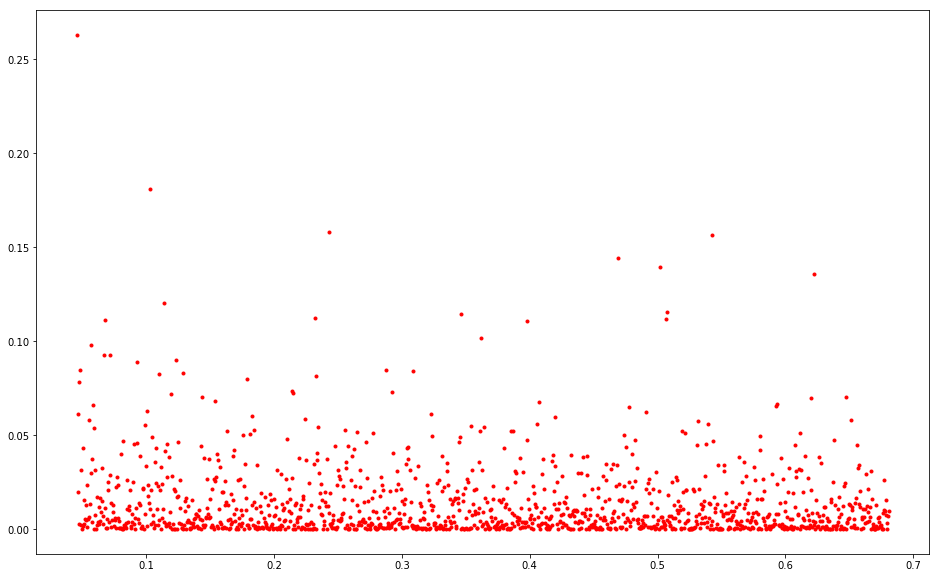

In [90]:
plt.figure(figsize=(16, 10))
plt.plot(x, e_all_squared, '.r')
plt.show()

In [91]:
errors = e_all_squared[:1300, 0]
grouped_errors = un_group(errors, 10)
statistic, p_value = scipy.stats.f_oneway(*grouped_errors)

In [92]:
print('Значение статистики: {stat}, p_value: {p_value}'.format(stat=statistic, p_value=p_value))

Значение статистики: 2.8306676260862016, p_value: 0.002660616138181588


p_value - имеет значение меньшее, чем 0.01, следовательно гипотеза о постоянстве дисперсии не отвергается

#### Boxplot для $ e_i^2 $

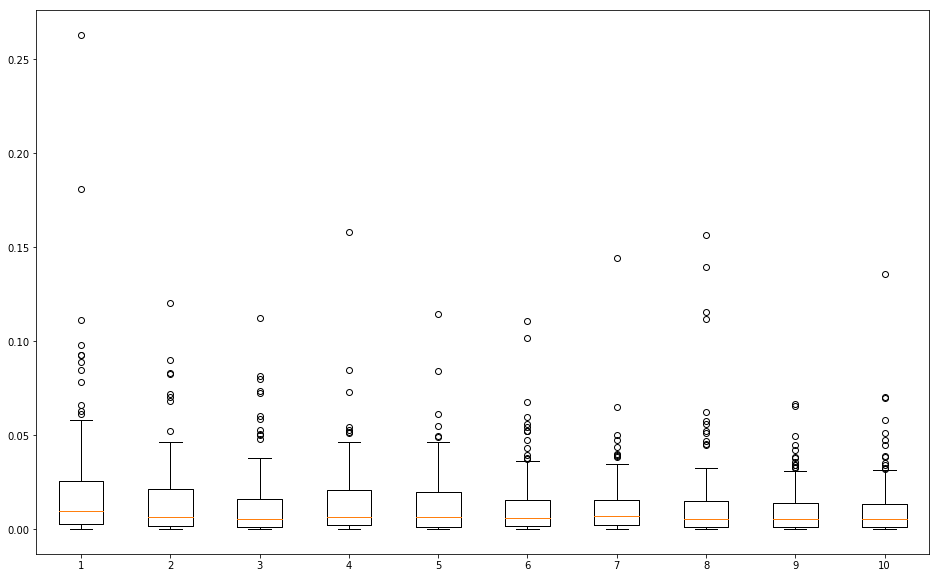

In [93]:
plt.figure(figsize=(16, 10))
ans = plt.boxplot(grouped_errors)

### Task 3

In [94]:
import statsmodels
import statsmodels.api as sm

/home/roman/projects/prediction_theory/.p/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [95]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)

In [96]:
n = X.shape[0]
m = X.shape[1]

In [97]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [98]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)
sigma = S / (n - m)
errors = e_all[:, 0]

errors = np.sort(errors)
normed_errors = (np.mean(errors) - errors) / np.std(errors)

norm = np.sort(np.random.normal(size=normed_errors.shape[0]))

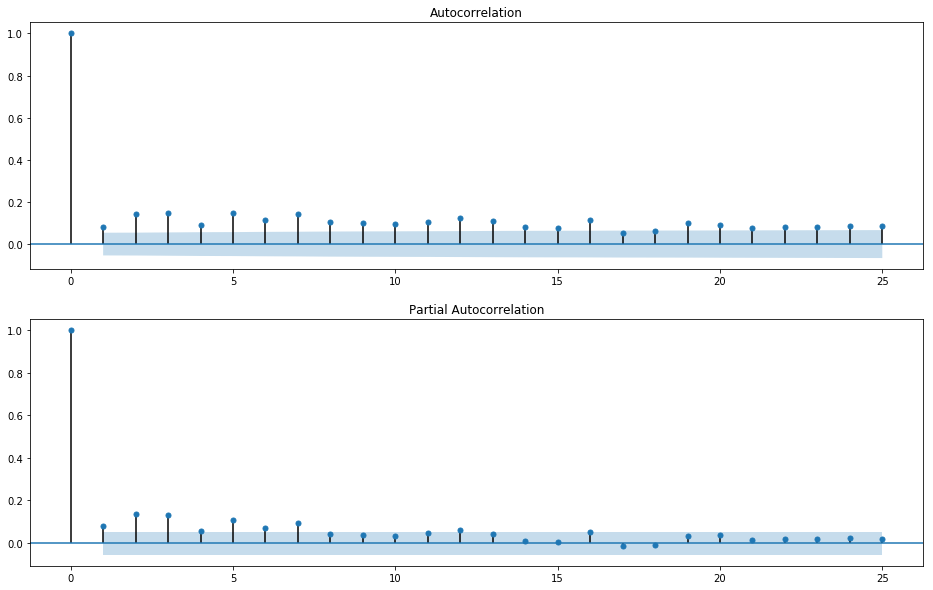

In [99]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_acf(e_all[:, 0], lags=25, ax=ax1)
fig = sm.graphics.tsa.plot_pacf(e_all[:, 0], lags=25, ax=ax2)

In [100]:
!ls images/

fourier        Критерий Льюнга-Бокса	  Шапиро-Уилка.png
kpss-test.png  Критерий Льюнга-Бокса.png


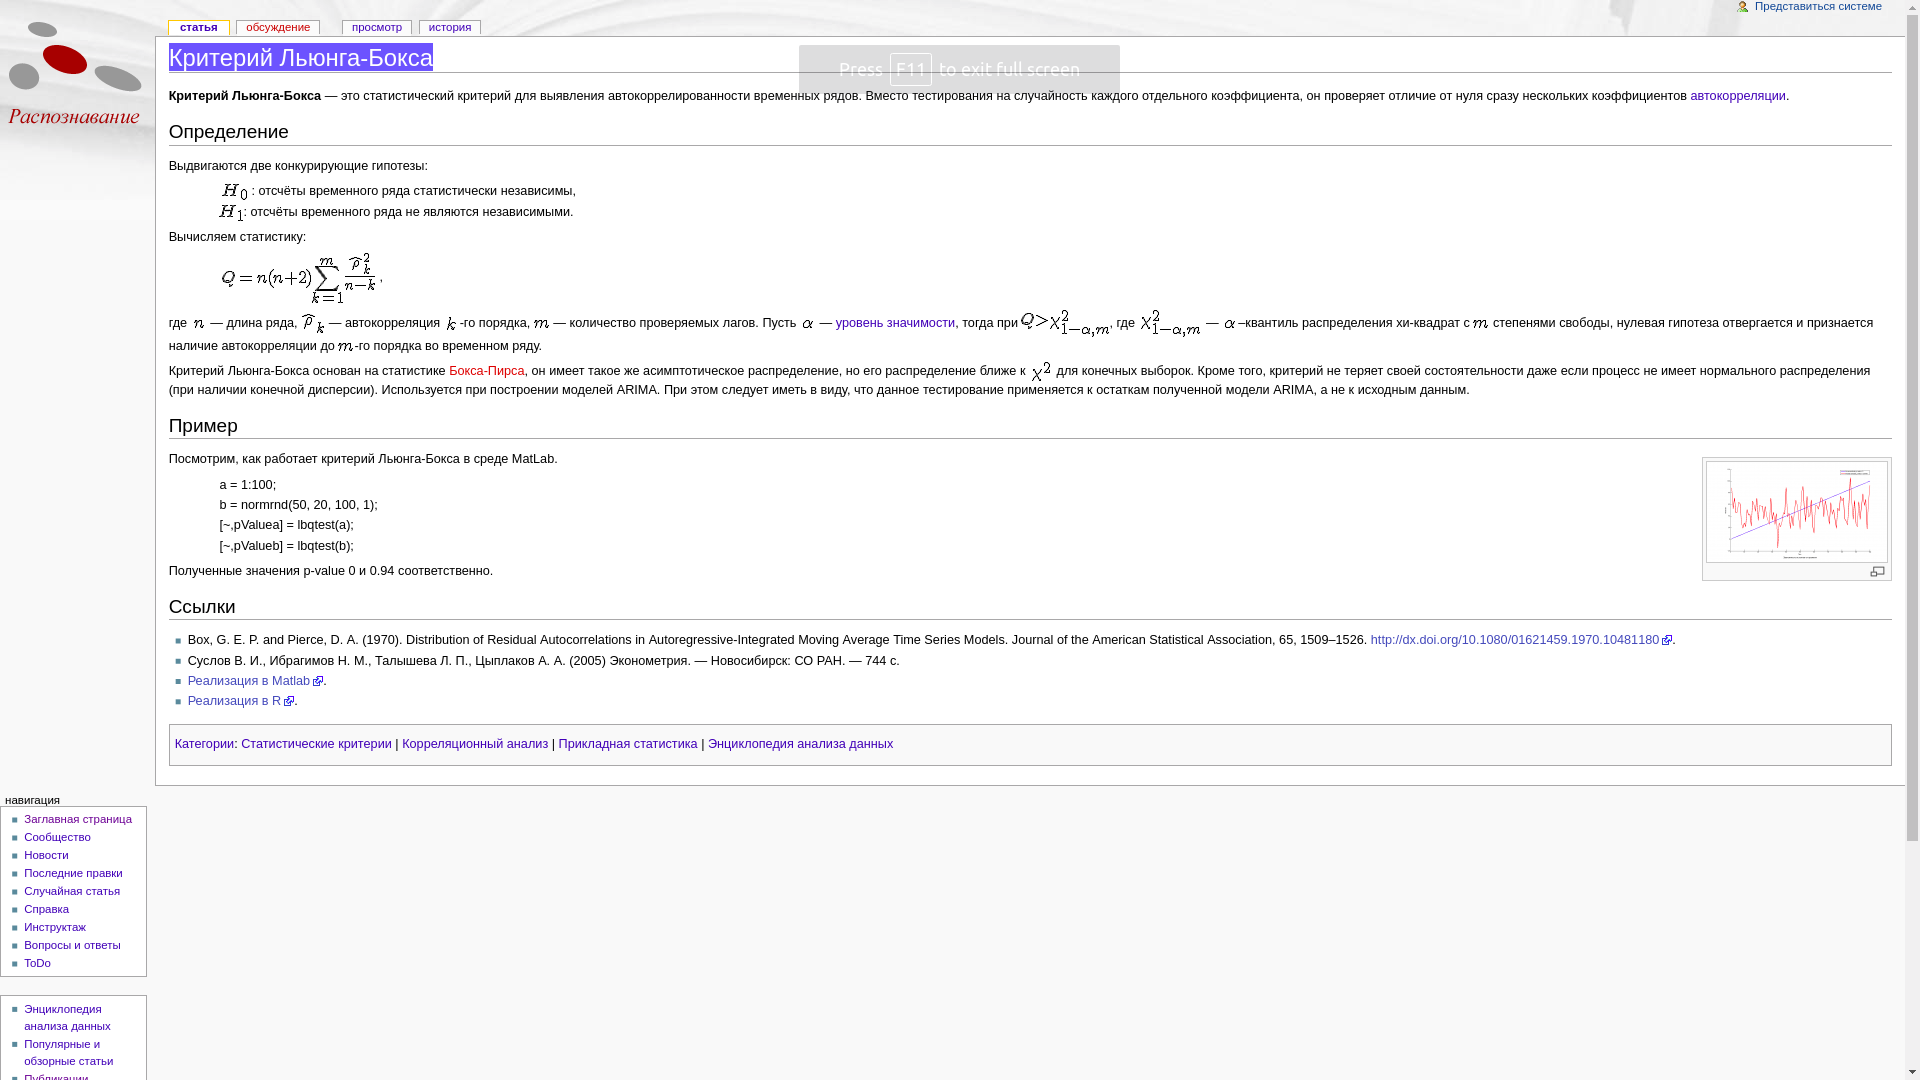

In [101]:
from IPython.display import Image
im = Image("images/Критерий Льюнга-Бокса.png")
im.height = 1600
im.width = 1600

im

In [102]:
q_test = sm.tsa.stattools.acf(e_all[:, 0], qstat=False)

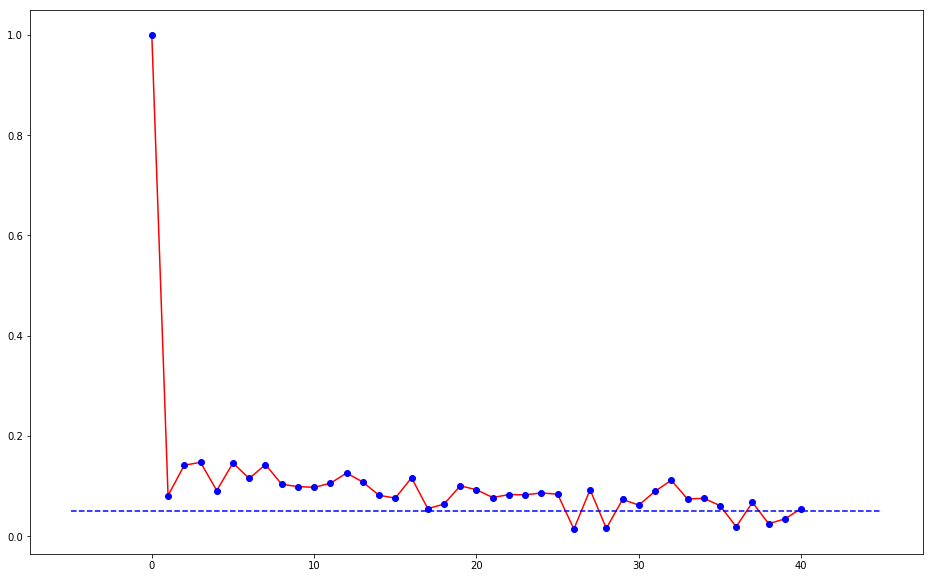

In [103]:
plt.figure(figsize=(16, 10))
plt.plot(q_test, 'r')
plt.plot(q_test, 'ob')
plt.plot([-5, 45], [0.05, 0.05], '--b')
plt.show()

### Task 4

In [104]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)

In [105]:
n = X.shape[0]
m = X.shape[1]

In [106]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [107]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)
sigma = S / (n - m)
errors = e_all[:, 0]

errors = np.sort(errors)
normed_errors = (np.mean(errors) - errors) / np.std(errors)

norm = np.sort(np.random.normal(size=normed_errors.shape[0]))

In [108]:
bins = 35

#### Гистограмма ошибок совместно с плотностью нормального распределения

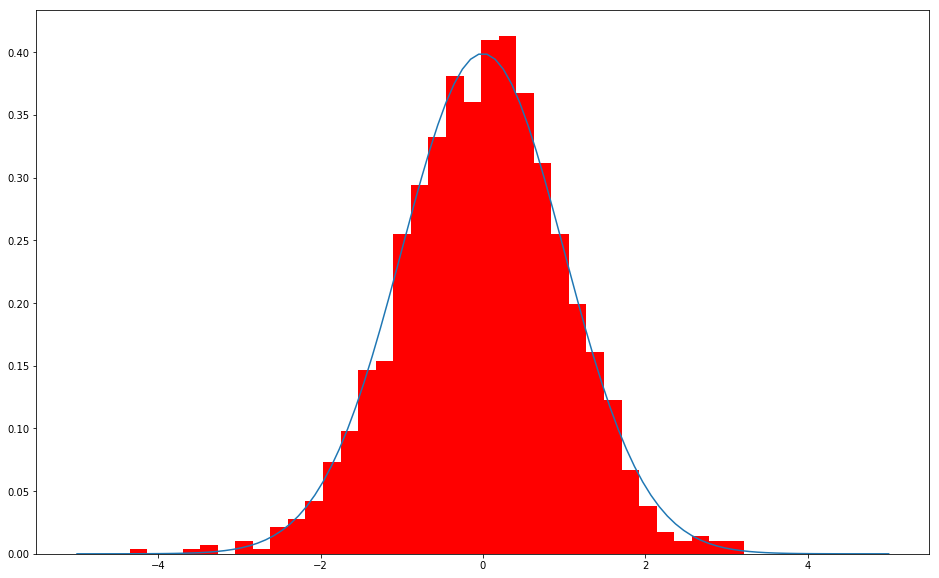

In [109]:
import scipy

a = np.linspace(-5, 5, 100)

plt.figure(figsize=(16, 10))
plt.hist(normed_errors, bins=bins, histtype='bar', color='r', density=True)
plt.plot(a, scipy.stats.norm.pdf(a), '-')
plt.show()

####  Вероятностная бумага для ошибок

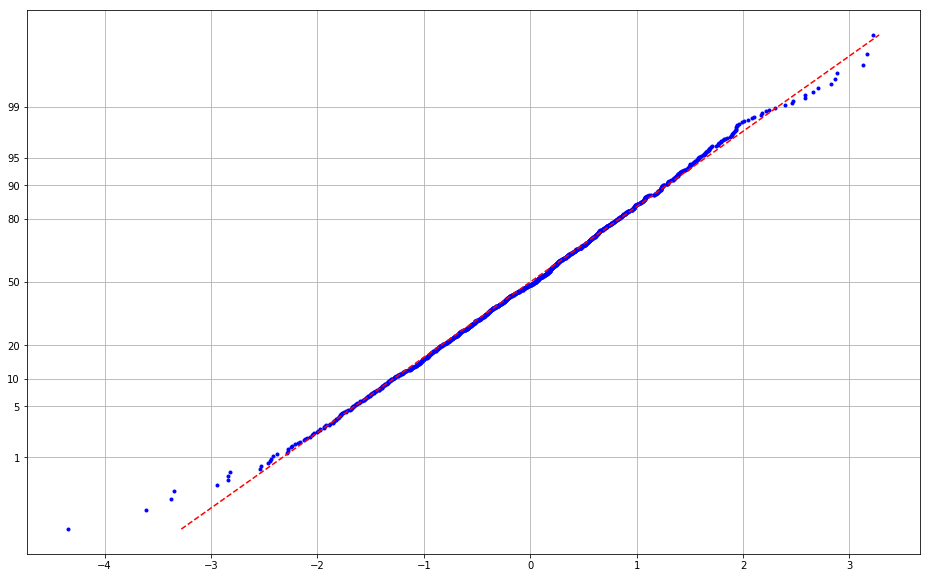

In [110]:
from scipy import stats
import matplotlib.pyplot as plt

(quantiles, values), (slope, intercept, r) = stats.probplot(normed_errors, dist='norm')

plt.figure(figsize=(16, 10))
plt.plot(values, quantiles,'.b')
plt.plot(quantiles * slope + intercept, quantiles, '--r')

ticks_perc = [1, 5, 10, 20, 50, 80, 90, 95, 99]

ticks_quan = [stats.norm.ppf(i/100.) for i in ticks_perc]
plt.yticks(ticks_quan, ticks_perc)

plt.grid()
plt.show()

Был проведен тест Шапиро-Уилка, так как он считается наиболее мощном из тестов для проверки гипотезы о нормальности выборки

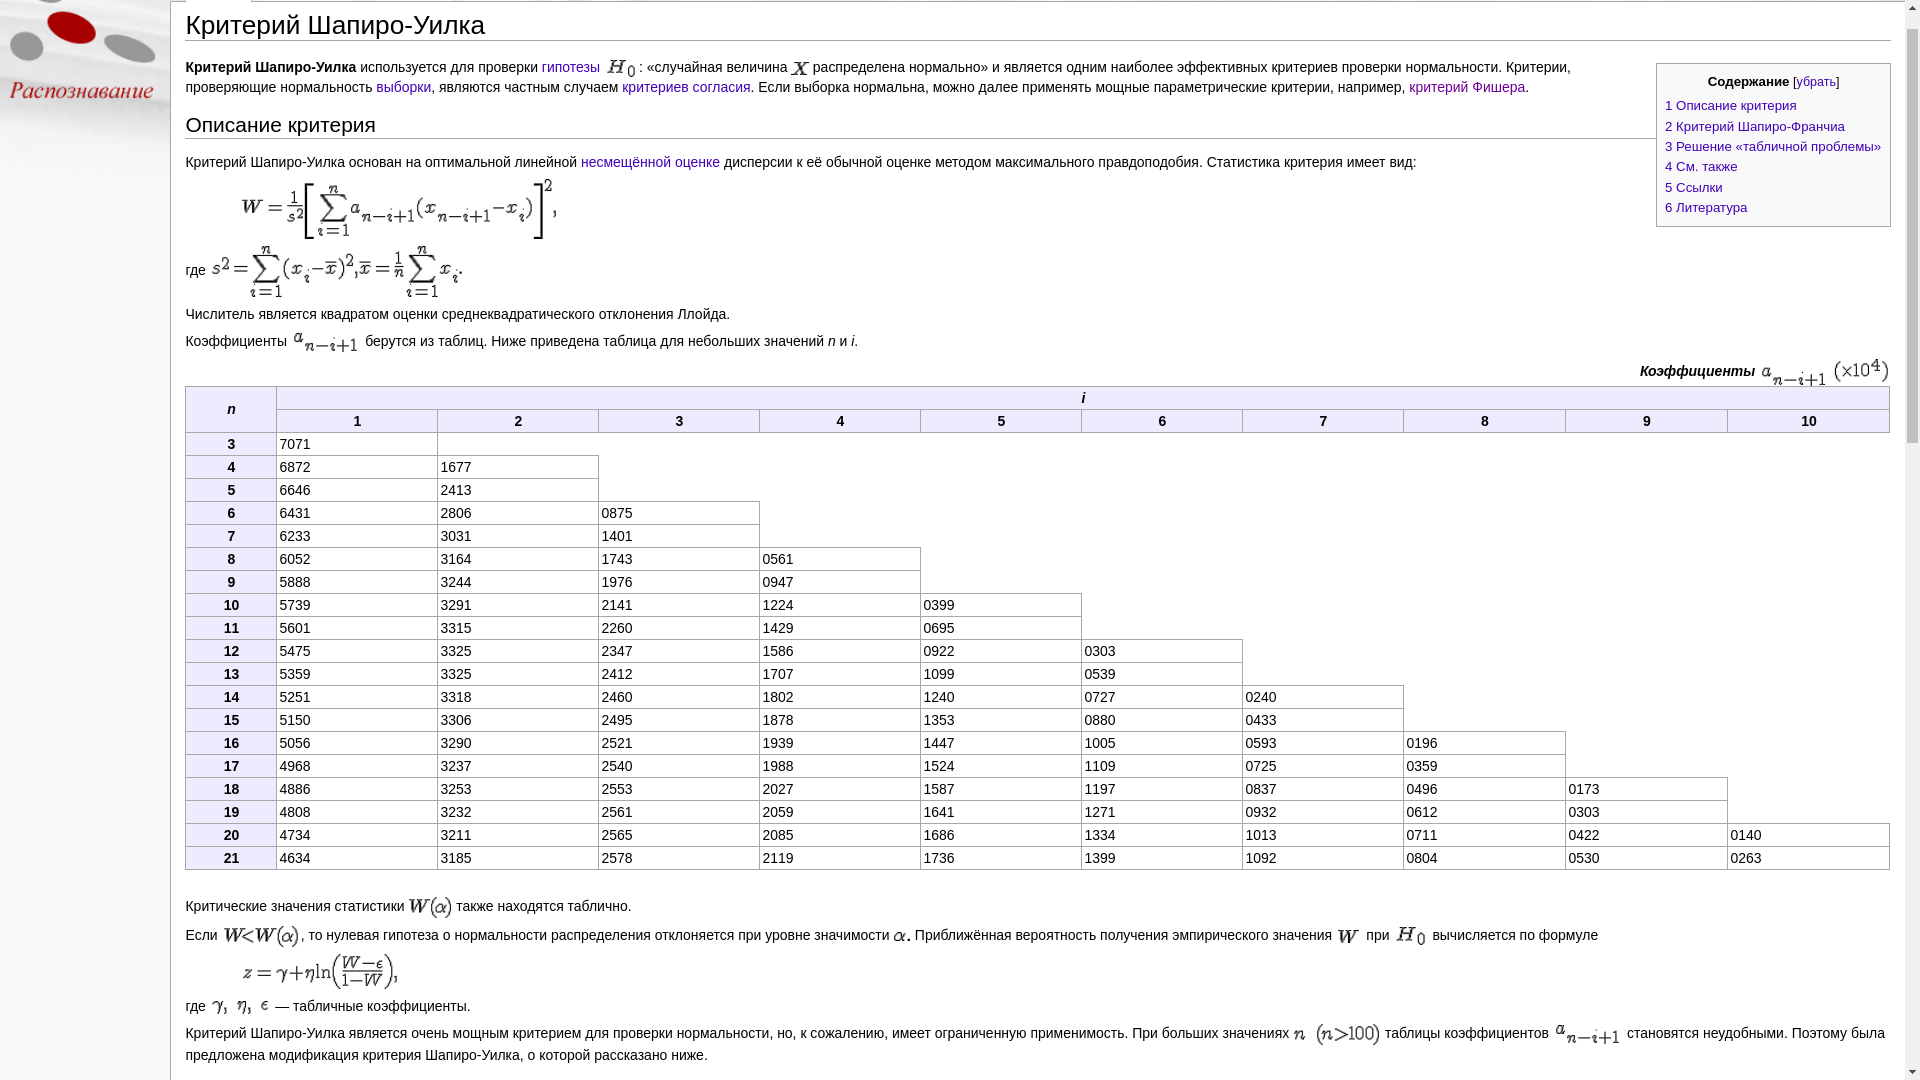

In [111]:
from IPython.display import Image
im = Image("images/Шапиро-Уилка.png")
im.height = 1600
im.width = 1600

im

In [112]:
res = scipy.stats.shapiro(normed_errors)

In [113]:
print('p_value = {p_value}'.format(p_value=res[1], alpha=0.01))

p_value = 0.05570127069950104


## Lab 4

### Task 1.1

In [114]:
p_times = pd.read_excel('../data/Time Series.xls', sheet_name='Давление в абсорбере')
p_times.head()

,"P, кгс/см2"
0,70.700745
1,70.698978
2,70.700861
3,70.700947
4,70.701433


In [115]:
p_times = p_times.values
times = np.array([[i * 4 for i in range(p_times.shape[0])]]).T

In [116]:
clf = linear_model.LinearRegression(fit_intercept=True)
clf.fit(times, p_times)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
predicted_p = clf.predict(times)

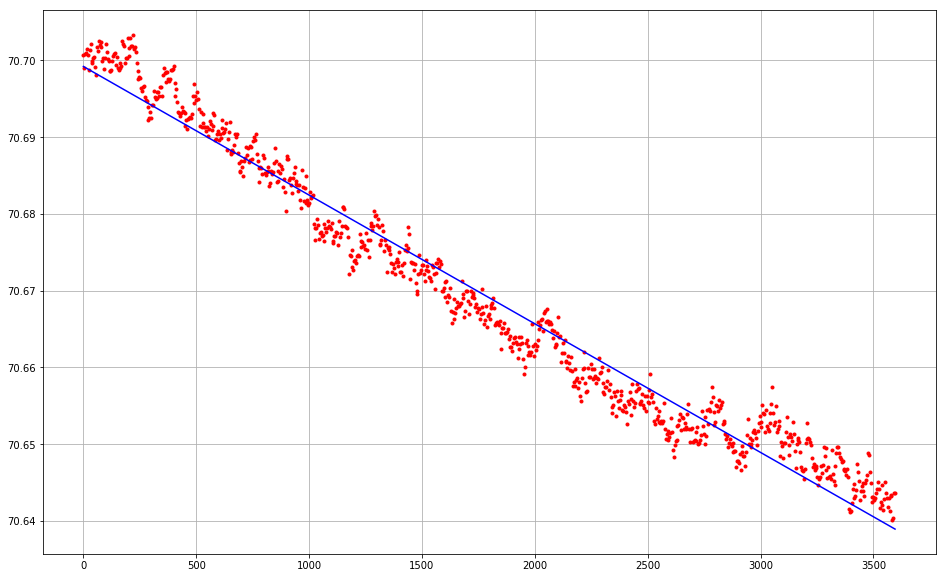

In [118]:
plt.figure(figsize=(16, 10))
plt.plot(times, p_times, '.r')
plt.plot(times, predicted_p, 'b')
plt.grid()
plt.show()

In [119]:
p_without_trend = p_times - predicted_p

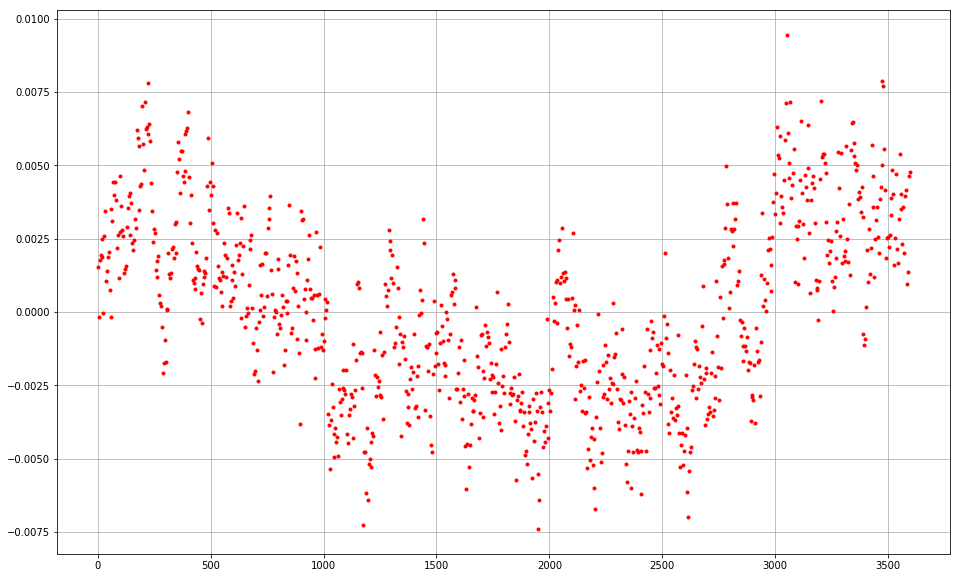

In [120]:
plt.figure(figsize=(16, 10))
plt.plot(times, p_without_trend, '.r')
# plt.plot(times, predicted_p, 'b')
plt.grid()
plt.show()

#### ACF

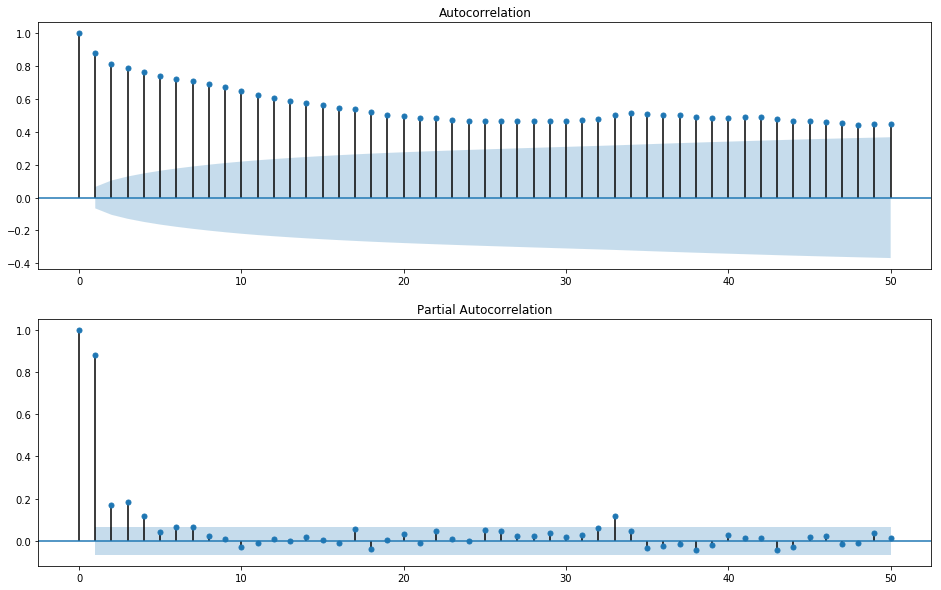

In [121]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_acf(p_without_trend, lags=50, ax=ax1 )
fig = sm.graphics.tsa.plot_pacf(p_without_trend, lags=50, ax=ax2)

#### Task 1.2

In [122]:
p_times = pd.read_excel('../data/Time Series.xls', sheet_name='Давление в абсорбере')
p_times.head()

,"P, кгс/см2"
0,70.700745
1,70.698978
2,70.700861
3,70.700947
4,70.701433


In [123]:
p_times = p_times.values
times = np.array([[i * 4 for i in range(p_times.shape[0])]]).T

In [124]:
from statsmodels.tsa.stattools import kpss

KPSS test
From Wikipedia, the free encyclopedia
In econometrics, Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests are used for testing a null hypothesis that an observable time series is stationary around a deterministic trend (i.e. trend-stationary) against the alternative of a unit root.

Contrary to most unit root tests, the presence of a unit root is not the null hypothesis but the alternative. Additionally, in the KPSS test, the absence of a unit root is not a proof of stationarity but, by design, of trend-stationarity. This is an important distinction since it is possible for a time series to be non-stationary, have no unit root yet be trend-stationary. In both unit root and trend-stationary processes, the mean can be growing or decreasing over time; however, in the presence of a shock, trend-stationary processes are mean-reverting (i.e. transitory, the time series will converge again towards the growing mean, which was not affected by the shock) while unit-root processes have a permanent impact on the mean (i.e. no convergence over time).

Such models were proposed in 1982 by Alok Bhargava in his Ph.D. thesis where several John von Neumann- or Durbin–Watson-type finite sample tests for unit roots were developed (see Bhargava, 1986). Later, Denis Kwiatkowski, Peter C. B. Phillips, Peter Schmidt and Yongcheol Shin (1992) proposed a test of the null hypothesis that an observable series is trend stationary (stationary around a deterministic trend). The series is expressed as the sum of deterministic trend, random walk, and stationary error, and the test is the Lagrange multiplier test of the hypothesis that the random walk has zero variance. KPSS-type tests are intended to complement unit root tests, such as the Dickey–Fuller tests. By testing both the unit root hypothesis and the stationarity hypothesis, one can distinguish series that appear to be stationary, series that appear to have a unit root, and series for which the data (or the tests) are not sufficiently informative to be sure whether they are stationary or integrated.

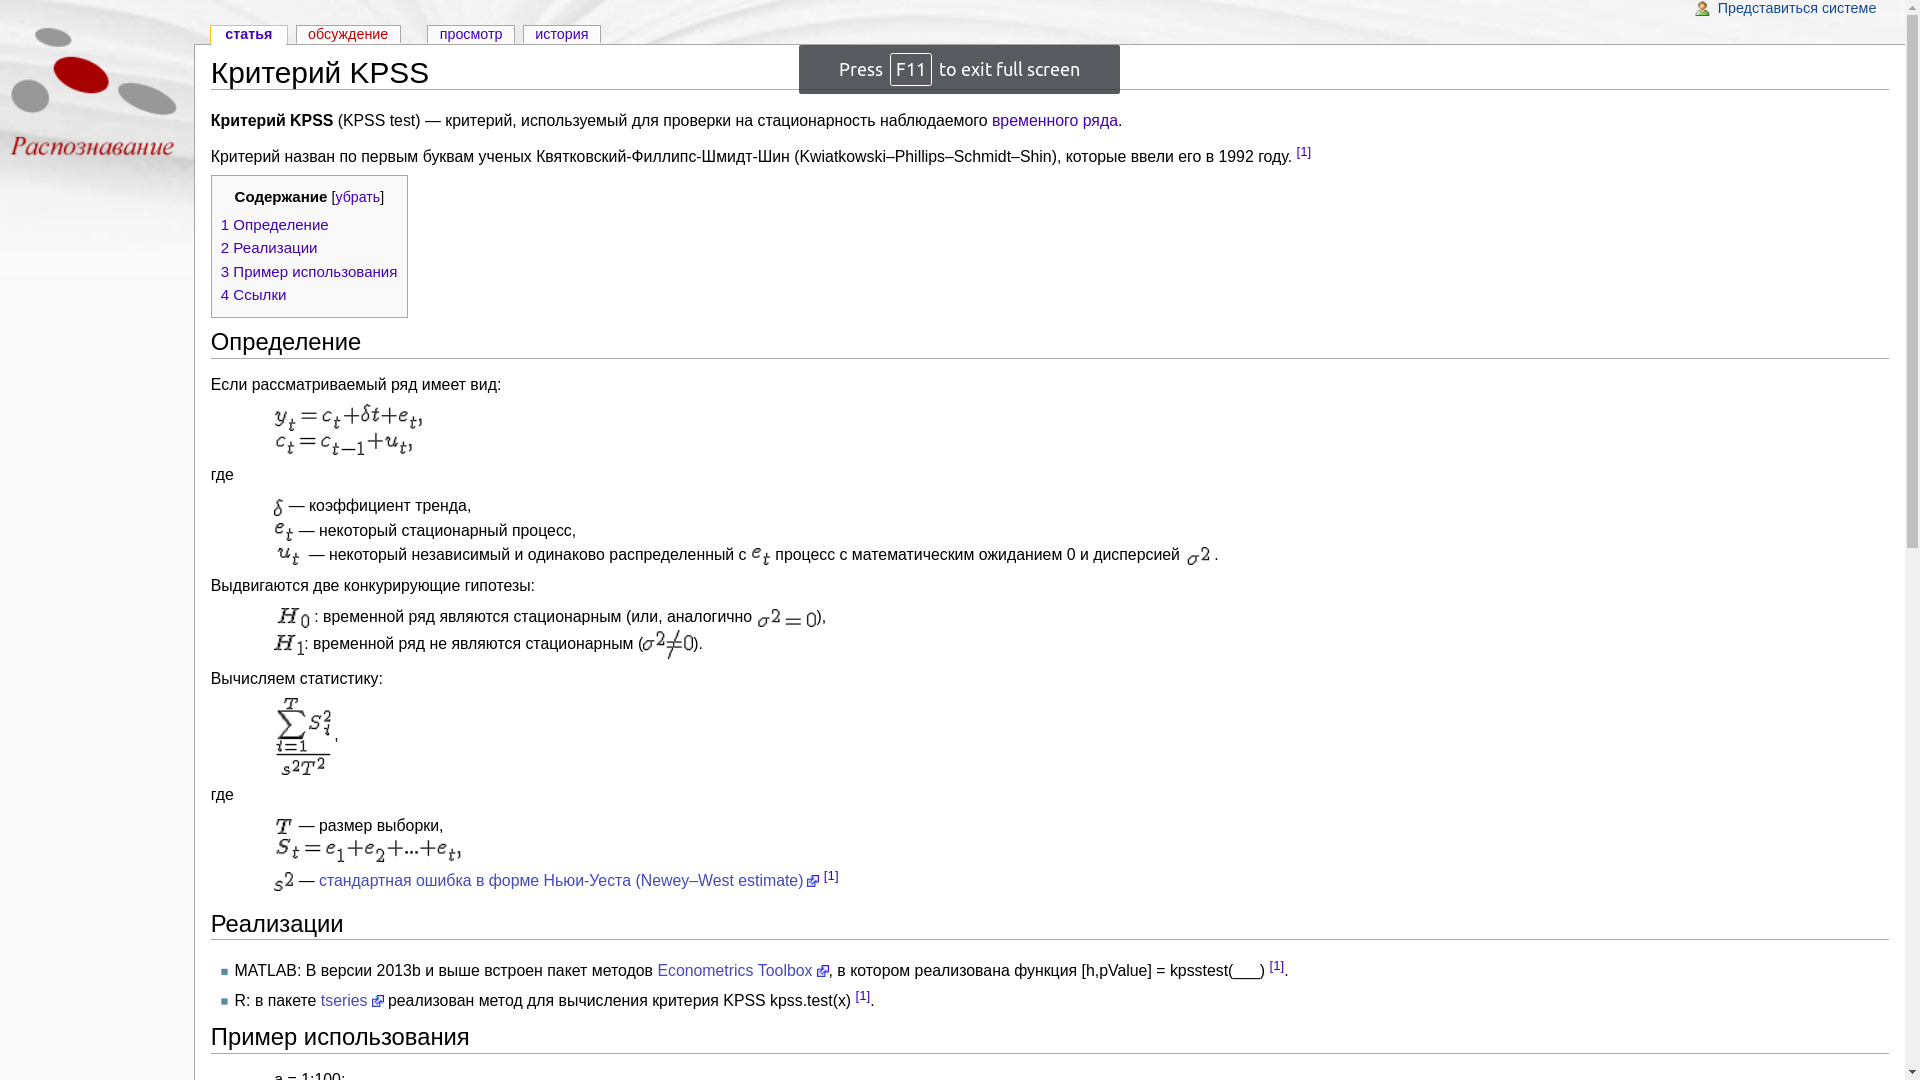

In [125]:
from IPython.display import Image
im = Image("images/kpss-test.png")
im.height = 1600
im.width = 1600

im

In [126]:
ans = kpss(p_without_trend[:, 0])
ans

/home/roman/projects/prediction_theory/.p/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(0.7744513242540826,
 0.01,
 21,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

##### ACF на основе остатков

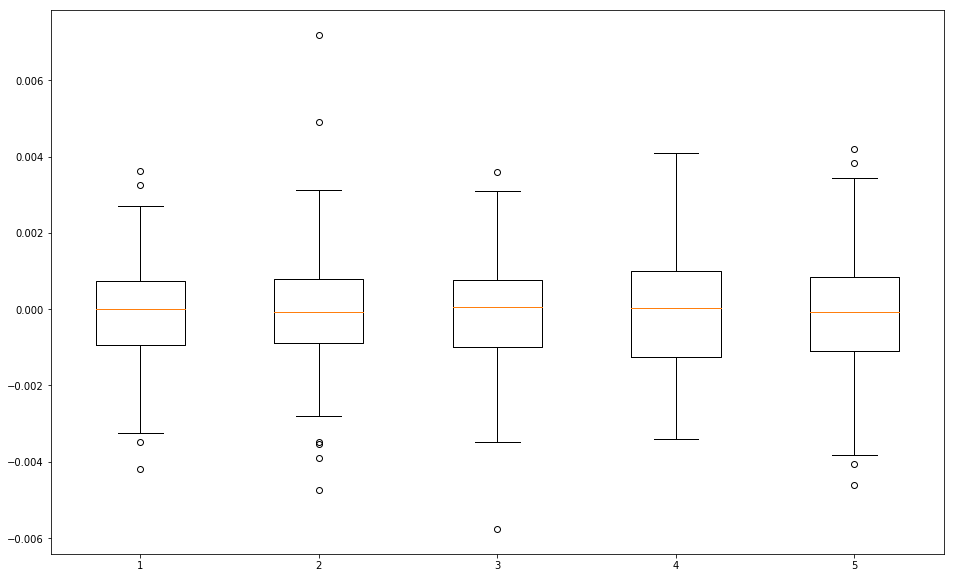

In [127]:
p_diffs = np.diff(p_times[:, 0], n=1)[:880]
grouped_series = un_group(p_diffs, 5)

plt.figure(figsize=(16, 10))
ans = plt.boxplot(grouped_series)

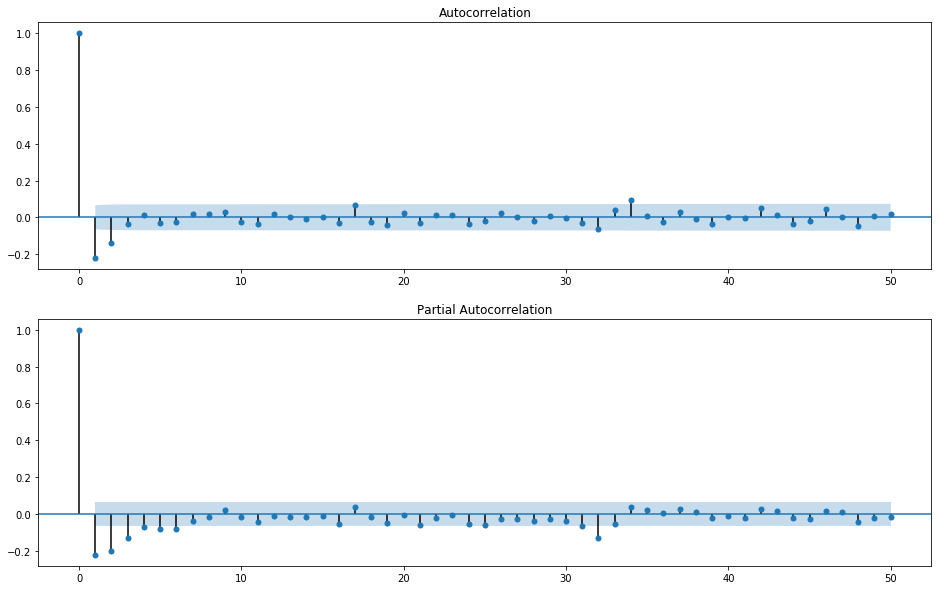

In [128]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_acf(p_diffs, lags=50, ax=ax1 )
fig = sm.graphics.tsa.plot_pacf(p_diffs, lags=50, ax=ax2)

##### С вычетом линейного тренда

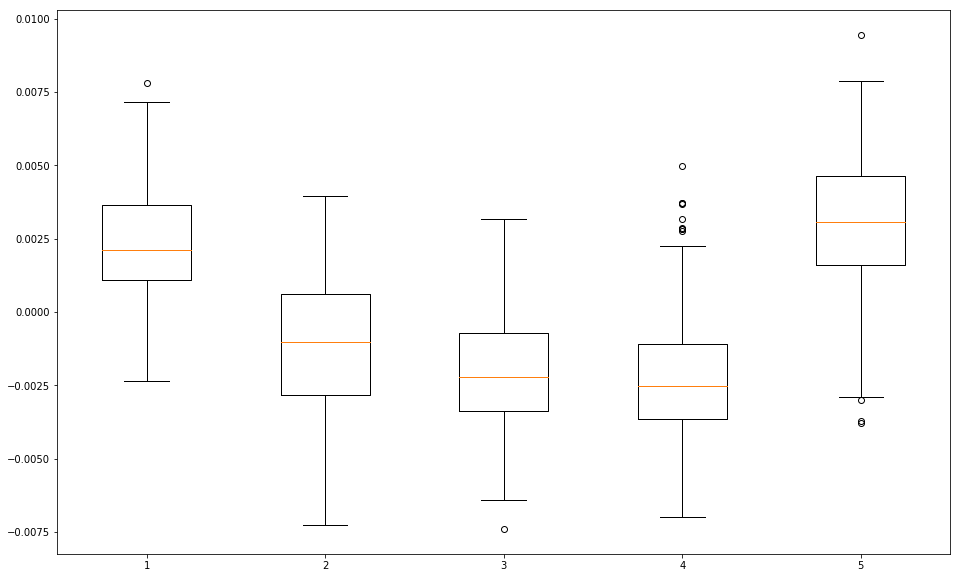

In [129]:
grouped_without_trend = un_group(p_without_trend[:, 0], 5)

plt.figure(figsize=(16, 10))
ans = plt.boxplot(grouped_without_trend)

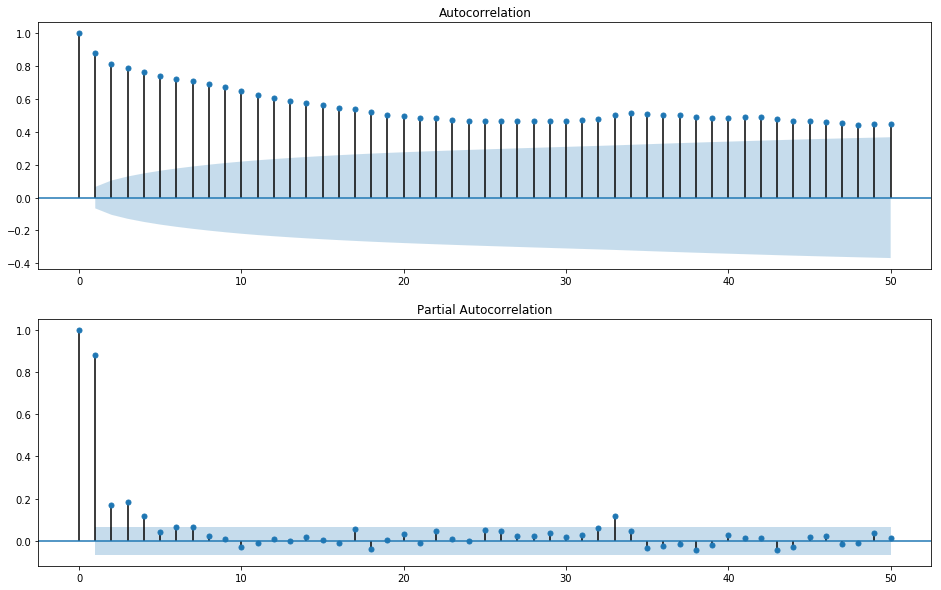

In [130]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_acf(p_without_trend[:, 0], lags=50, ax=ax1 )
fig = sm.graphics.tsa.plot_pacf(p_without_trend[:, 0], lags=50, ax=ax2)

#### Вывод

Лучше посчитать разности 1-го порядка в данной реализации ряда, так как математическое ожидание не от времени, а автокорреляционная функция ``почти`` не корреллирована со временем

### Task 2

##### Task 2.1

In [131]:
q_times = pd.read_excel('../data/Time Series.xls', sheet_name='Расход на ГРС')[1:]
q_times.head()

,Время,"Q, тыс. м3/сут"
1,00ч 10.01,338.0
2,02ч 10.01,318.0
3,04ч 10.01,331.0
4,06ч 10.01,374.0
5,08ч 10.01,530.0


In [132]:
def date_time_to_hours(str_date_time):
    time = int(str_date_time.split(' ')[0][:2])
    date = str_date_time.split(' ')[1]
    
    day = int(date.split('.')[0]) - 10
    month = int(date.split('.')[1]) - 1
    
    res_hours = day * 24 + month * 31 * 24 + time
    
    return res_hours
    

In [133]:
times = q_times['Время'].apply(date_time_to_hours).values

##### 2.1 Облако точек

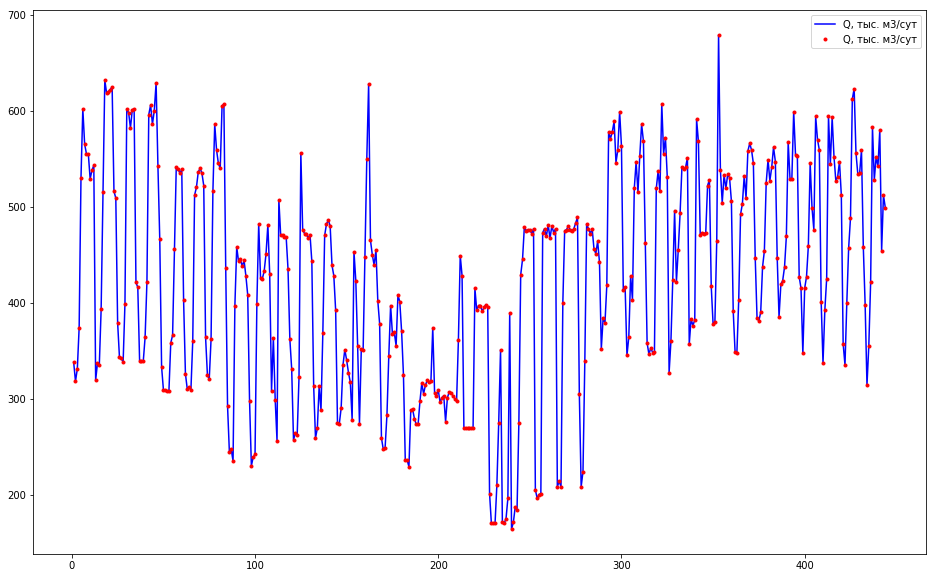

In [134]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)
plot = q_times.plot(ax=ax, style='b')
plot = q_times.plot(ax=ax, style='.r')

In [135]:
Q = q_times['Q, тыс. м3/сут'].values

In [136]:
_t = np.array([times]).T
_q = np.array([Q]).T

In [137]:
clf = linear_model.LinearRegression()
clf.fit(_t, _q)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:
trend_q = clf.predict(_t)

In [139]:
q_without_trend = _q - trend_q

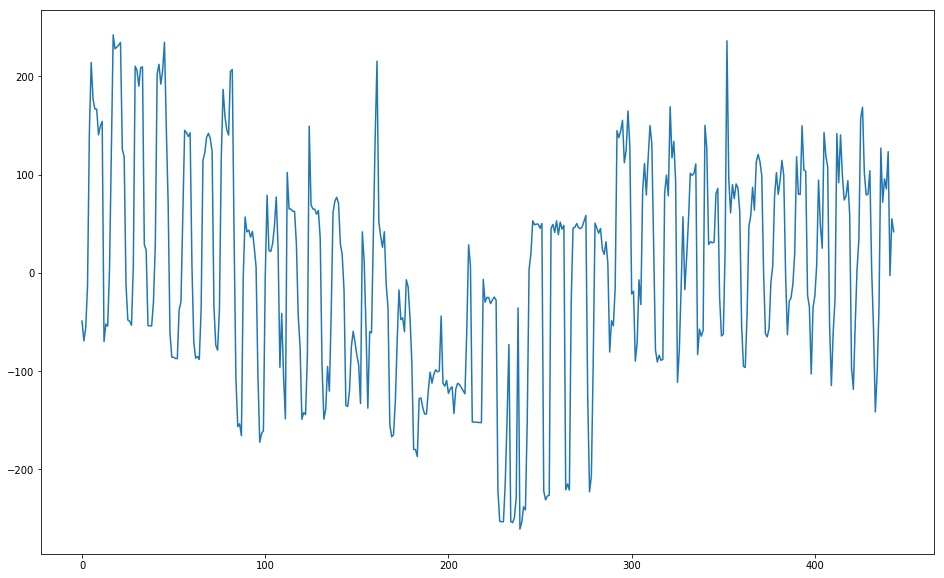

In [140]:
plt.figure(figsize=(16, 10))
plt.plot(q_without_trend)
plt.show()

##### Автокорреляционная функция

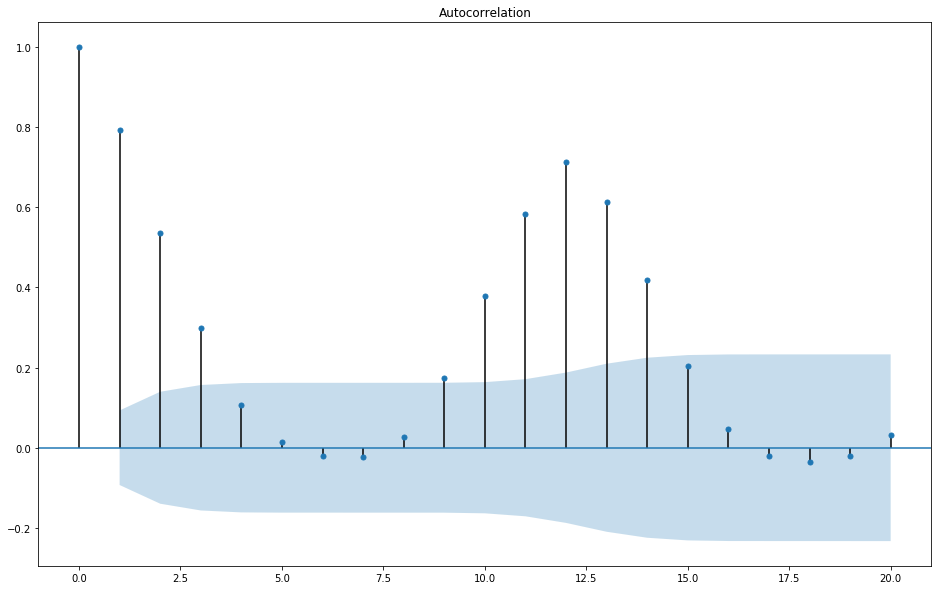

In [141]:
fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(q_without_trend, lags=20, ax=ax1 )

``Явно видно наличие периода``

По графику, облако точек и автокоррелляции видно, что период примерно равен 24 часам - что можно было предположить из природы данного ряда

In [142]:
Q_diff_series = np.array([np.diff(Q, n=1)])

##### 2.1 График разностей пятого порядка

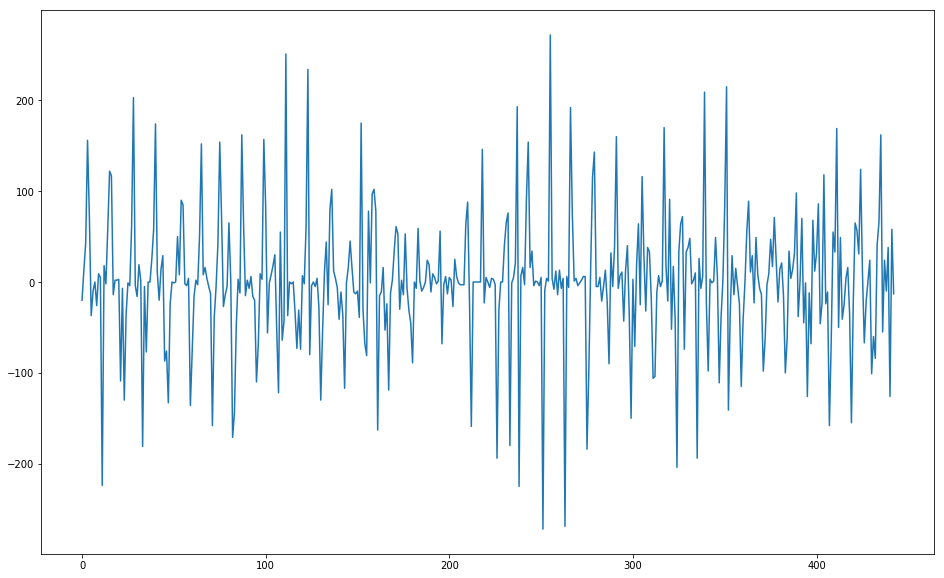

In [143]:
plt.figure(figsize=(16, 10))
plt.plot(Q_diff_series[0])
plt.show()

##### 2.3.a Удален тренд с помощью ряда Фурье

In [144]:
T = 12

In [145]:
fourier = np.column_stack((np.cos(times * np.pi / T), np.sin(times * np.pi / T), 
                           np.cos(2 * times * np.pi / T), np.sin(2 * times * np.pi / T), 
                           np.cos(3 * times * np.pi / T), np.sin(3 * times * np.pi / T), 
                           np.cos(4 * times * np.pi / T), np.sin(4 * times * np.pi / T), 
                           np.cos(5 * times * np.pi / T), np.sin(5 * times * np.pi / T), 
                           np.cos(6 * times * np.pi / T), np.sin(6 * times * np.pi / T), 
                           np.cos(7 * times * np.pi / T), np.sin(7 * times * np.pi / T), 
                           np.cos(8 * times * np.pi / T), np.sin(8 * times * np.pi / T), 
                           np.cos(9 * times * np.pi / T), np.sin(9 * times * np.pi / T), 
                           np.cos(10 * times * np.pi / T), np.sin(10 * times * np.pi / T), 
                           np.cos(11 * times * np.pi / T), np.sin(11 * times * np.pi / T)))

In [146]:
clf = linear_model.LinearRegression(fit_intercept=True)
clf.fit(fourier, q_without_trend)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
predicted_q = clf.predict(fourier)
q_lost = Q_diff_series.T - predicted_q[:-1]

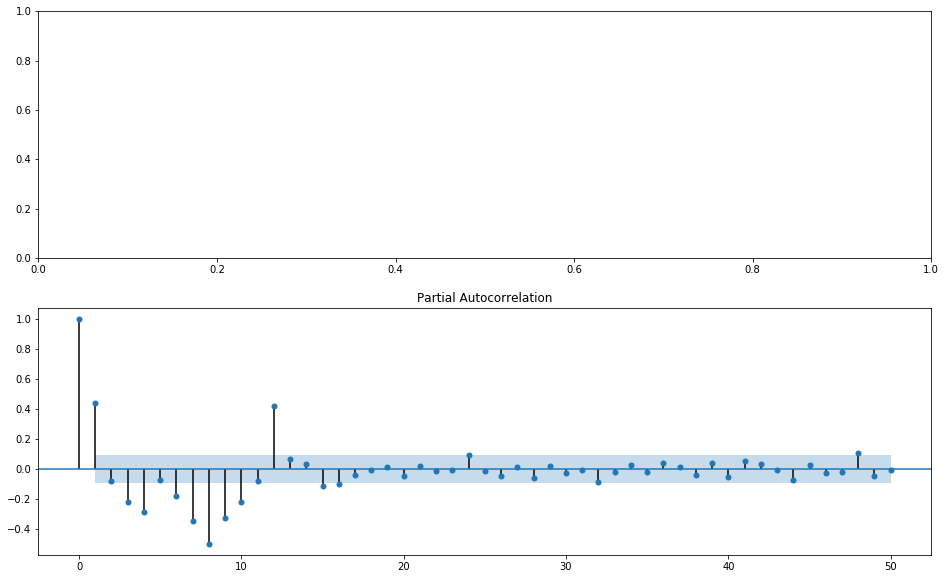

In [148]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# fig = sm.graphics.tsa.plot_acf(q_lost, lags=50, ax=ax1 )
fig = sm.graphics.tsa.plot_pacf(q_lost, lags=50, ax=ax2)

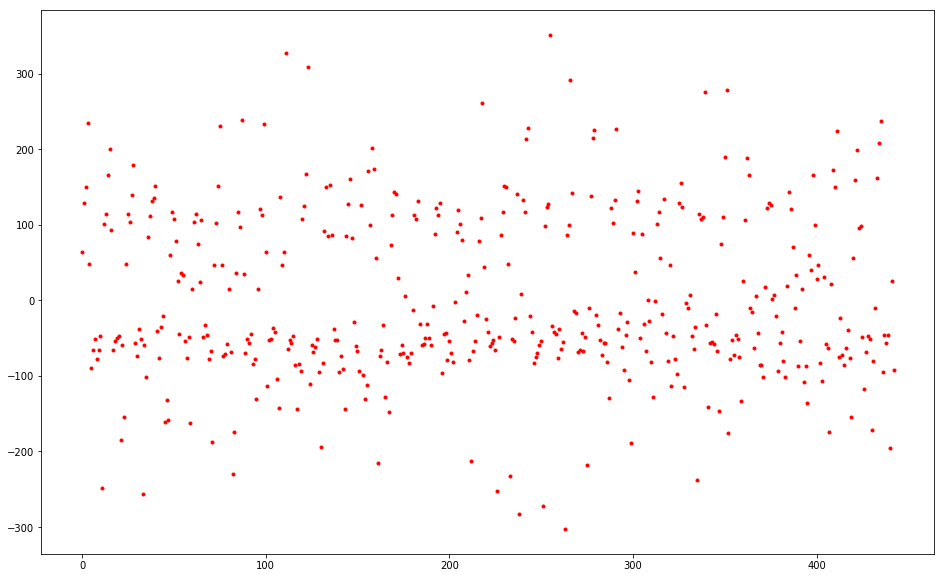

In [149]:
plt.figure(figsize=(16, 10))
plt.plot(q_lost, '.r')
plt.show()

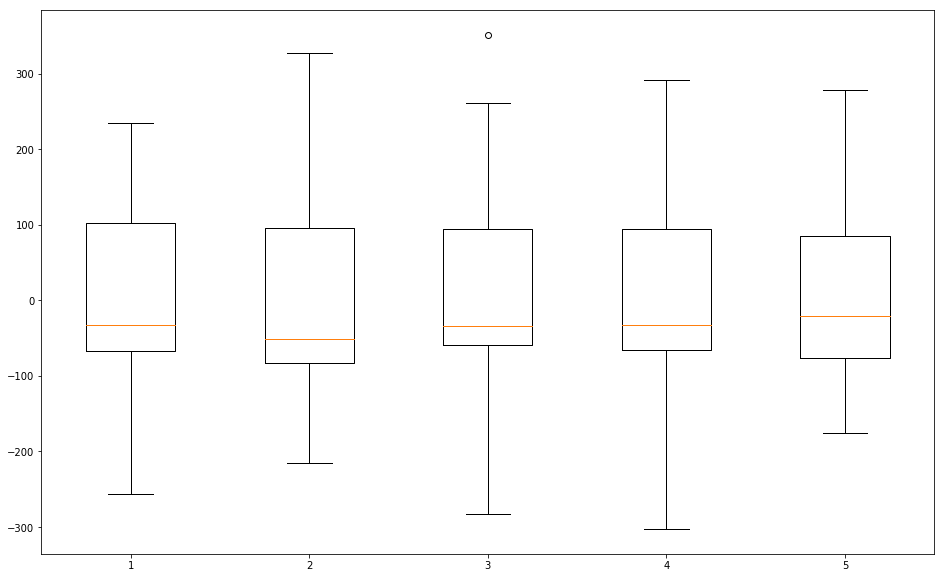

In [150]:
un_grouped_errors = un_group(q_lost[:435, 0], 5)

plt.figure(figsize=(16, 10))
plt.boxplot(un_grouped_errors)
plt.show()

In [151]:
## res = scipy.stats.shapiro(q_lost)
stat = res[0]
p_value = res[1]

print('W={w}, p_value={p}'.format(w=stat, p=p_value))

W=0.9976767897605896, p_value=0.05570127069950104


Нулевая гипотеза о нормальности остатков не отвергается при уровне значимости 0.0005

##### 2.3.b Введены индикаторы для каждого времени суток

In [152]:
ind = np.zeros((Q.shape[0], 12))

In [153]:
for i in range(ind.shape[0]):
    p = i % 12
    ind[i, p] = 1

In [154]:
clf = linear_model.LinearRegression()
clf.fit(ind, q_without_trend)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
ind_predicted = clf.predict(ind)

In [156]:
q_lost_ind = q_without_trend - ind_predicted

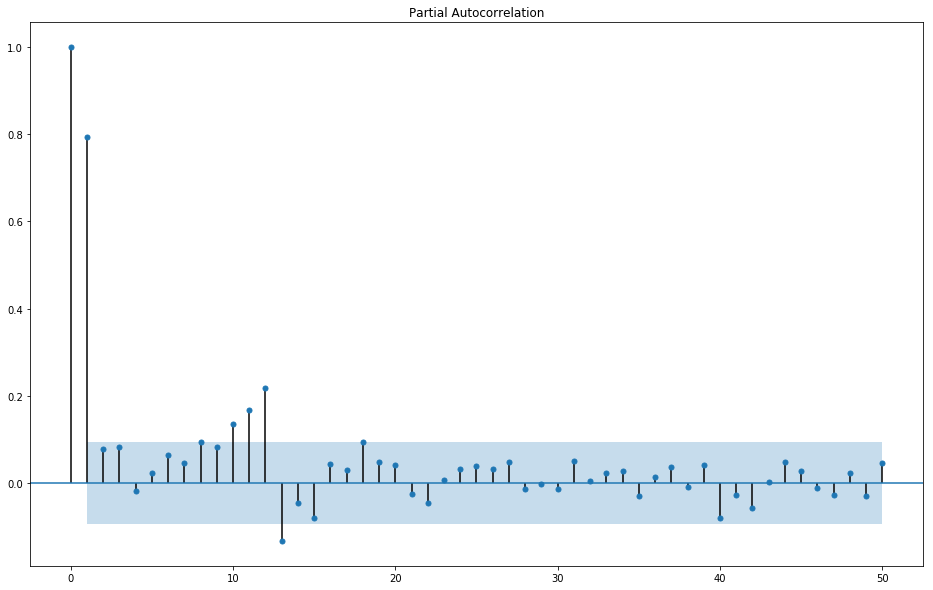

In [157]:
fig = plt.figure(figsize=(16, 10))

ax2 = fig.add_subplot(111)

# fig = sm.graphics.tsa.plot_acf(q_lost_ind, lags=50, ax=ax1 )
fig = sm.graphics.tsa.plot_pacf(q_lost_ind, lags=50, ax=ax2)

##### 2.3.c Средние значения

In [158]:
ind = np.zeros((Q.shape[0], 12))

In [159]:
for i in range(ind.shape[0]):
    p = i % 12
    ind[i, p] = np.mean(Q[p::12])

In [160]:
clf = linear_model.LinearRegression()
clf.fit(ind, q_without_trend)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
ind_predicted_mean = clf.predict(ind)

In [162]:
q_lost_ind_mean = q_without_trend - ind_predicted_mean

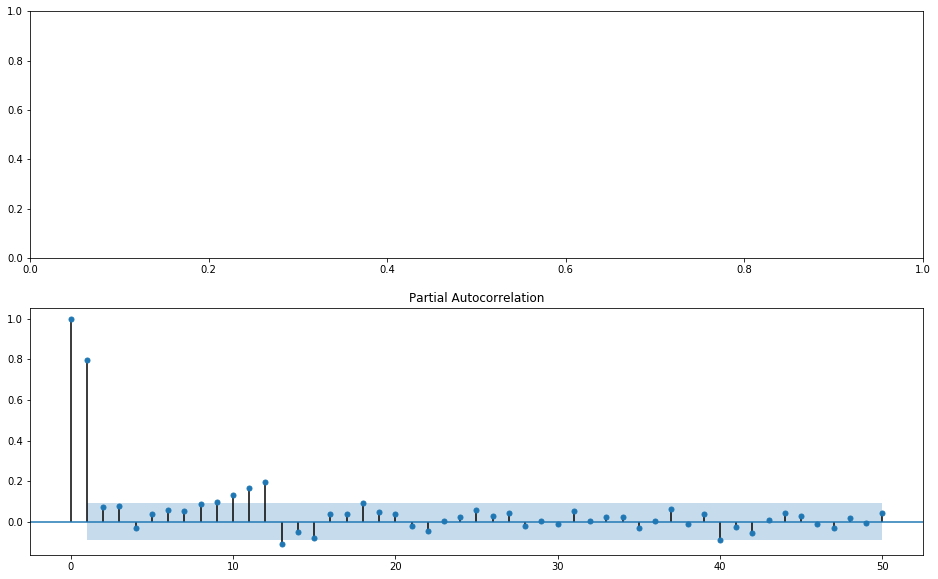

In [163]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# fig = sm.graphics.tsa.plot_acf(q_lost_ind, lags=50, ax=ax1 )
fig = sm.graphics.tsa.plot_pacf(q_lost_ind_mean, lags=50, ax=ax2)

#### Results

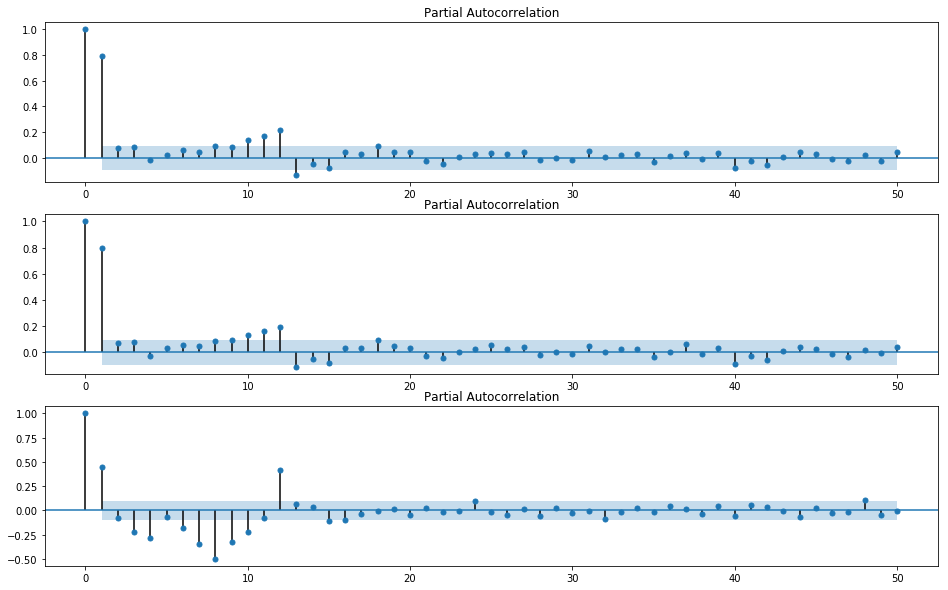

In [164]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

fig = sm.graphics.tsa.plot_pacf(q_lost_ind, lags=50, ax=ax1 )
fig = sm.graphics.tsa.plot_pacf(q_lost_ind_mean, lags=50, ax=ax2)
fig = sm.graphics.tsa.plot_pacf(q_lost, lags=50, ax=ax3)

##### 2.3.d

In [165]:
cycle_diff = np.zeros((12, 1))

In [166]:
lost_diff_cycle = q_without_trend[12:] - q_without_trend[:-12]

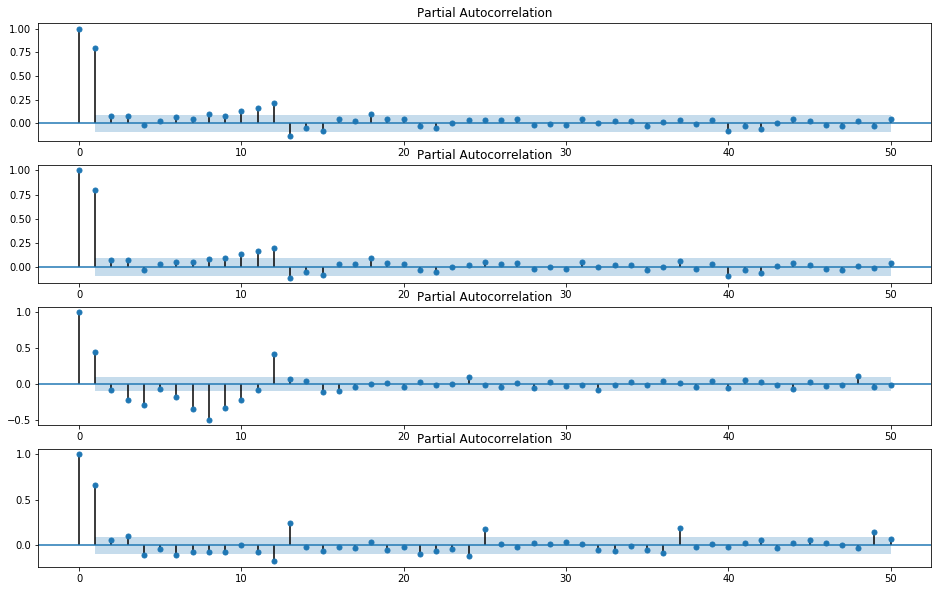

In [167]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

fig = sm.graphics.tsa.plot_pacf(q_lost_ind, lags=50, ax=ax1 )
fig = sm.graphics.tsa.plot_pacf(q_lost_ind_mean, lags=50, ax=ax2)
fig = sm.graphics.tsa.plot_pacf(q_lost, lags=50, ax=ax3)
fig = sm.graphics.tsa.plot_pacf(lost_diff_cycle, lags=50, ax=ax4)

## Lab 5

### Task 1

#### $ y_t - 0.3 y_{t-1} + 0.5 y_{t-2} = \xi_{t} $
#### Характеристическое уравнение :
$ 1 - 0.3 \alpha + 0.5 \alpha^2 = 0 $ и получаем корни $ \alpha_{1, 2} = 0.3 \pm 1.382 i $
$ | \alpha | = 1.414186 < 1 $

Так как модули кратных корней равны и больше 1, следует что ряд не стационарный

#### Рассматривается процесс Юла, авторегрессия второго порядка.

$ y_t - 0.3 y_{t-1} + 0.5 y_{t-2} = (1 - 0.3 L + 0.5 L^2) = \xi_{t} $ - отсюда нас интересует лаговый многочлен 

Домножим его на $ X_{t - \tau} $ и получим разностное уравнение для коэффициентов корреляции $ \rho (\tau) $ :

$ \rho(\tau) - 0.3 \rho(\tau - 1) + 0.5 \rho(\tau - 2) = 0 $
В книге М.Г. Сухарева(101-102) описано решение этого уравнения, а точнее, общее решение для $ \xi = r e^{\pm \theta i}$ :

### $ \rho(\tau) = r^{\tau} \frac{sin(\theta \tau + \psi)}{sin(\psi) } $, где: 
$ tg(\psi) = \frac{1 + r^2}{1 - r^2} tg(\theta) $ - уравнение устанавливающее связь между переменными 


In [168]:
xi_1 = complex(0.3, 1.382)
xi_2 = complex(0.3, -1.382)

$ r = 1.414186 $

$ \theta = 1.3570360698278  $

In [169]:
r = 1.414186
theta = 1.3570

In [170]:
import math
tg_theta = (1 + r ** 2) / (1 - r ** 2) * math.tan(theta)

In [171]:
tg_theta

-13.81831401425595

In [172]:
import sympy
from sympy.solvers import solve

In [173]:
psi = sympy.Symbol('psi')
ans = solve(sympy.tan(psi) - tg_theta, psi)[0]
print('psi = {ans}'.format(ans=ans))

psi = -1.49855453464149


#### $ \psi = -1.498554 $

### $ \rho(\tau) = - 1.414^{\tau} sin(1.357 \tau - 1.5) $

In [174]:
import matplotlib.pyplot as plt

### ACF построенная

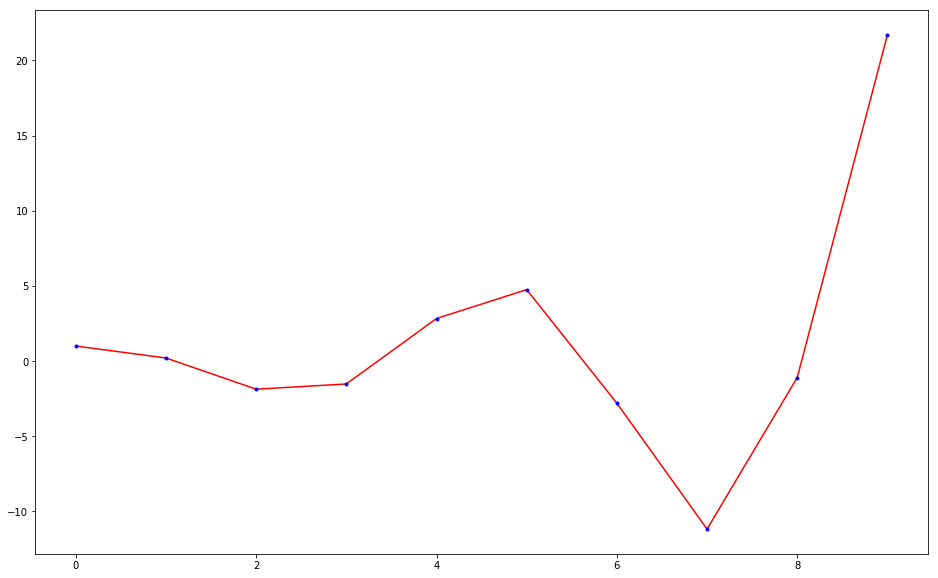

In [175]:
tau = range(10)

def ro(t):
    return -1 * math.pow(1.414, t) * math.sin(1.357 * t - 1.5)

plt.figure(figsize=(16, 10))
plt.plot(tau, [ro(t) for t in tau], 'r')
plt.plot(tau, [ro(t) for t in tau], '.b')
plt.show()

### Task 2

Здесь так же требуется оценить дисперсию модели, на основе которой далее строится интервальный прогноз. Покажем, как это делается, на простом примере модели AR(2, 1), которая имеет вид

$ y_t - 0.3 y_{t-1} + 0.5 y_{t-2} = (1 - 0.3 L + 0.5 L^2) = \xi_{t} $

### Task 3

In [176]:
def d_k(k, a1, a2, sigma):

    alpha_0 = 1
    alpha_1 = a1
    alpha_2 = a1 * alpha_1 + a2
    alpha_n = alpha_2
    
    alphas = [ alpha_0, alpha_1 ]
    
    s = math.pow(alpha_0, 2) + math.pow(alpha_1, 2)
    
    for i in range(2, k):
        s += math.pow(alpha_n, 2)
        alphas.append(alpha_n)
        
    return math.pow(sigma, 2) * s, alphas

Т.к. $ \xi $ нормально распределенная с.в. с $ \sigma = 1 $ -> при $ \alpha = 0.01, c_{\alpha} = 3.715 $

$\widetilde{y_{t+k}}-t_{1-\frac{1-\alpha}{2}, n - 2}\delta_{k}\leq y_{t+k}\leq \widetilde{y_{t+k}}+t_{1-\frac{1-\alpha}{2}, n - 2} \delta_{k}$

Пример вычисления $ { \alpha_n } $

In [177]:
d_k(3, -0.3, 0.5, 1)

(1.4381, [1, -0.3, 0.59])

### Task 4

#### Point 4.1

In [290]:
p_times = pd.read_excel('../data/Time Series.xls', sheet_name='Давление в абсорбере')
p_times.head()

,"P, кгс/см2"
0,70.700745
1,70.698978
2,70.700861
3,70.700947
4,70.701433


In [291]:
P = p_times.values
ar_param = 10

In [292]:
dP = np.array([np.diff(P[:, 0], n=1)]).T

In [293]:
pf = np.zeros((dP.shape[0] - 10, ar_param))

In [294]:
# for i in range(dP.shape[0] - 20):
#     _t = dP[(i + 10):(i + 20), :]
#     pf[i, 1:] = _t[:, 0]
#     pf[i,  0] = 1
    
for i in range(dP.shape[0] - 10):
    _t = dP[i:i + 10, :]
    pf[i, :] = _t[:, 0]
#     pf[i,  0] = 1

In [295]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(pf, dP[10:])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [296]:
predicted_P = clf.predict(pf)

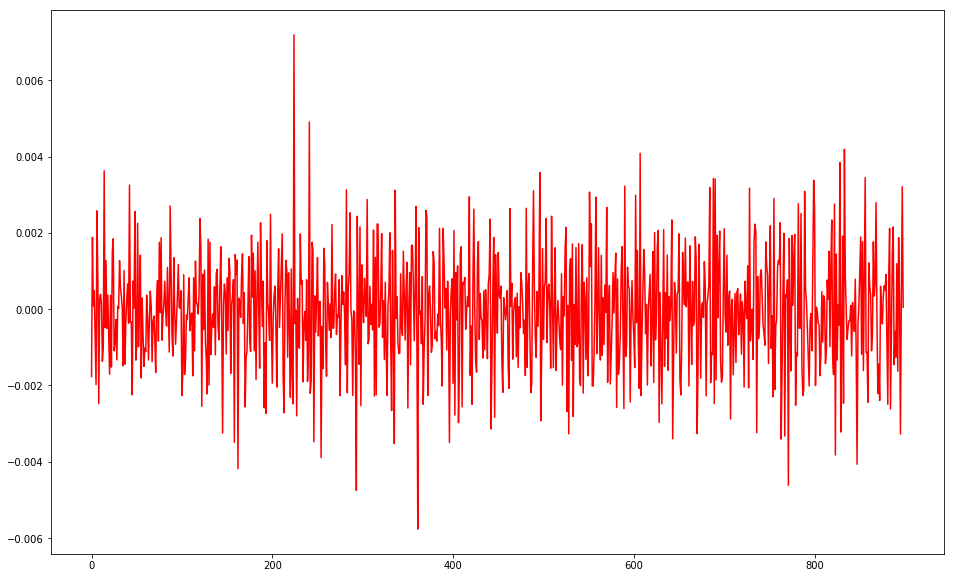

In [297]:
plt.figure(figsize=(16, 10))
plt.plot(dP, 'r')
plt.show()

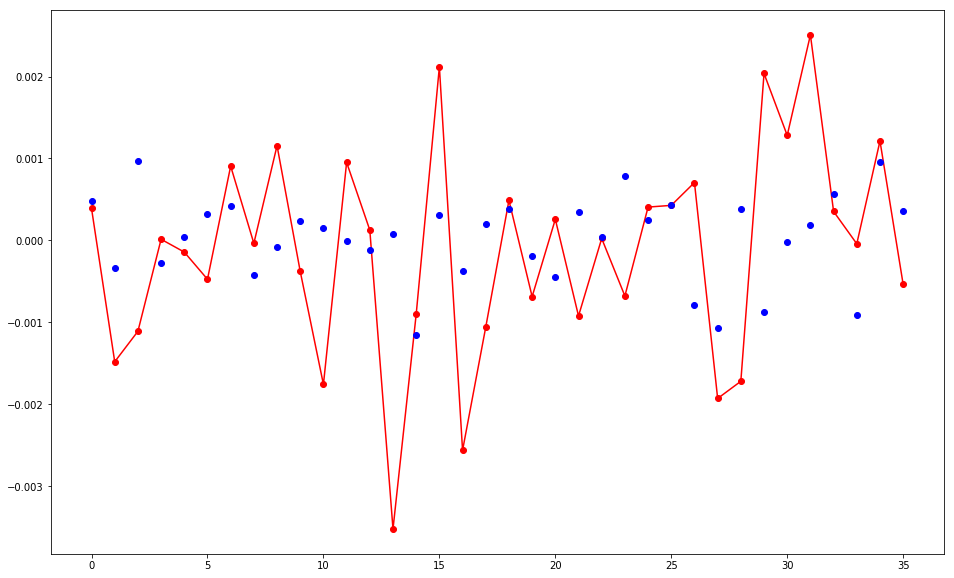

In [298]:
plt.figure(figsize=(16, 10))
plt.plot(dP[10::25], '-or')
plt.plot(predicted_P[::25], 'ob')
plt.show()

In [299]:
p_losts = predicted_P - dP[10:]

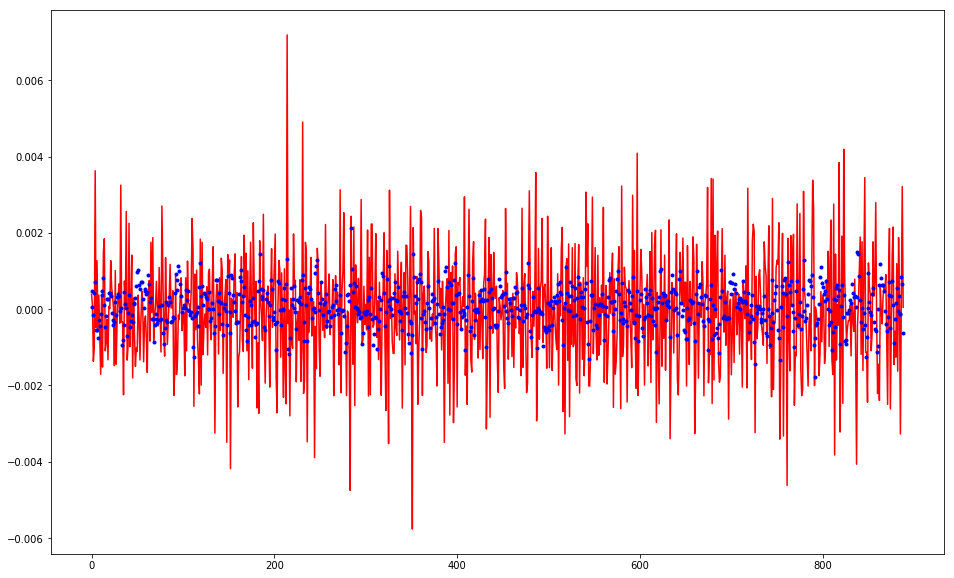

In [300]:
plt.figure(figsize=(16, 10))
plt.plot(dP[10:], 'r')
plt.plot(predicted_P, '.b')
plt.show()

In [301]:
p_lost_errors = p_losts[:879]
# res = scipy.stats.shapiro(p_lost_errors)
# print('p_value = {p_value}'.format(p_value=res[1], alpha=0.01))

# print('Значение $ p_value $ говорит о том, что гипотеза о нормальности распределения остатков не отвергается.')

Остатки некорреллированы


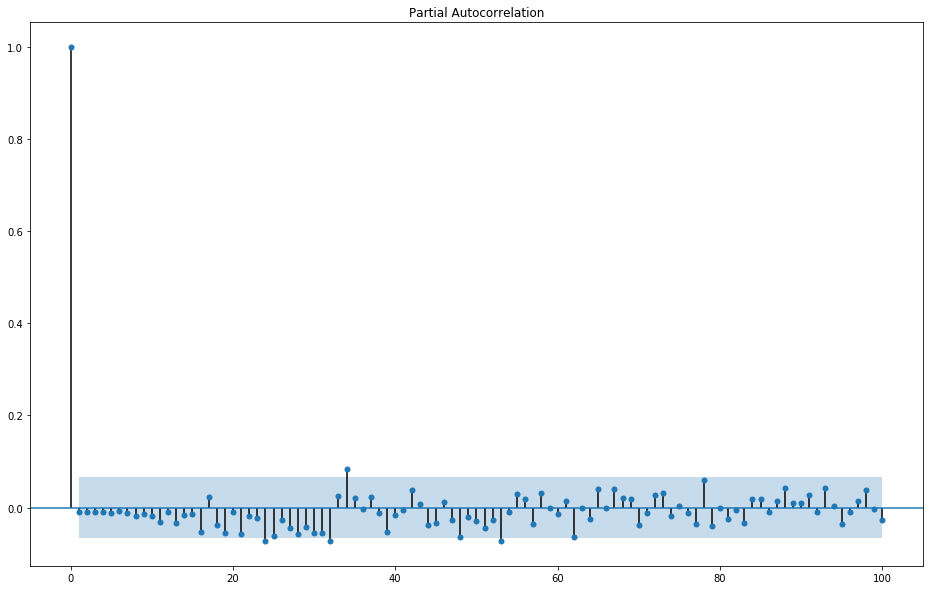

In [302]:
fig = plt.figure(figsize=(16, 10))
ax2 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(p_losts, lags=100, ax=ax2)

print('Остатки некорреллированы')

In [303]:
n = pf.shape[0]
m = pf.shape[1]

In [304]:
e_all = p_lost_errors
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((P - np.mean(P)) ** 2)
sigma = S / (n - m)

In [305]:
coef = clf.coef_

In [306]:
D = sigma * linalg.inv(np.dot(pf.T, pf))
D = np.diag(D)

In [307]:
for b, c in zip(coef.flatten(), D):
    t_s = b / np.sqrt(np.abs(c))
    t_s = 2 * (1 - t.cdf(np.abs(t_s), df=n - m))
    print(t_s)

0.9614604879152691
0.4412660062787568
0.9334828696498223
0.46901974613606656
0.030081427493407364
0.002466081627590322
0.003919184693496058
4.207548858214949e-07
1.0658141036401503e-14
0.0


Использую T-критерий - видно, что все факторы (1,  значимые(!)

#### Point 4.2

##### Из модели отброшены незначимые факторы

In [308]:
_pf = np.column_stack(( pf[:, 4:] )).T

In [309]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(_pf, dP[10:])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [310]:
predicted_P = clf.predict(_pf)

In [311]:
p_losts = predicted_P - dP[10:]

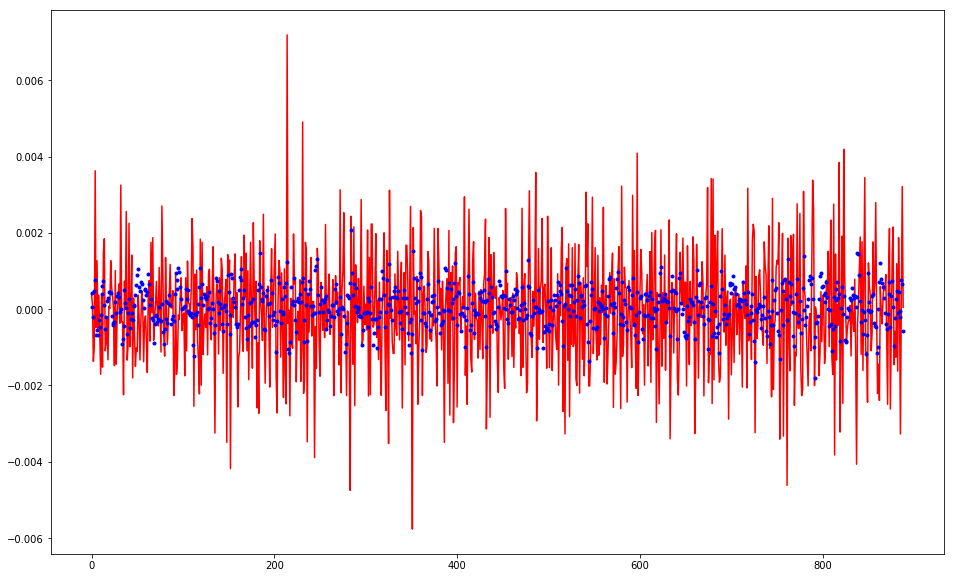

In [312]:
plt.figure(figsize=(16, 10))
plt.plot(dP[10:], 'r')
plt.plot(predicted_P, '.b')
plt.show()

Остатки некорреллированы


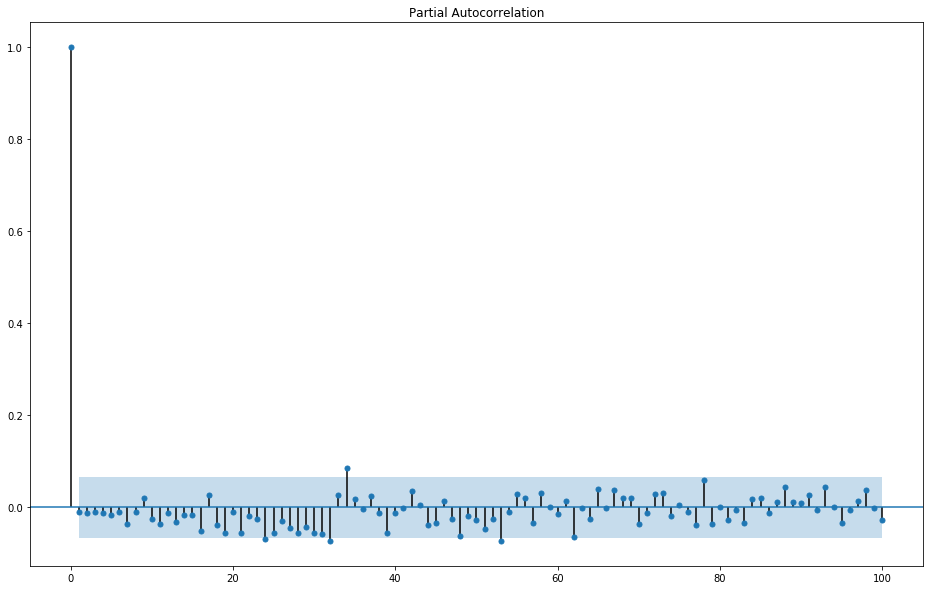

In [313]:
fig = plt.figure(figsize=(16, 10))
ax2 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(p_losts, lags=100, ax=ax2)

print('Остатки некорреллированы')

In [264]:
n = pf.shape[0]
m = pf.shape[1]

In [314]:
e_all = p_lost_errors
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((P - np.mean(P)) ** 2)
sigma = S / (n - m)

In [315]:
coef = clf.coef_

In [316]:
D = sigma * linalg.inv(np.dot(pf.T, pf))
D = np.diag(D)

In [317]:
for b, c in zip(coef.flatten(), D):
    t_s = b / np.sqrt(np.abs(c))
    t_s = 2 * (1 - t.cdf(np.abs(t_s), df=n - m))
    print(t_s)

0.030757554222483163
0.0029768573904085383
0.004746658059139097
8.288470534356662e-07
3.2818192607919627e-13
4.440892098500626e-16


##### Все факторы теперь значимые(!)

###### Всего значимых факторов - 6

#### Point 4.3

In [257]:
def ACF_AR(q, ax, lags):
    cols = [ pf[:, j] for j in range(q) ]
    _pf = np.array(( cols )).T
    
    
    clf = linear_model.LinearRegression(fit_intercept=True)
    clf.fit(_pf, dP[10:])
    
    predicted_P = clf.predict(_pf)
    p_losts = dP[10:] - predicted_P
    
#     print('Модель AR({p})'.format(p=q))
#     ax2.set_title('Модель AR({p})'.format(p=i))
    sm.graphics.tsa.plot_pacf(p_losts[:879], lags=lags, ax=ax)
#     fig.show()

In [268]:
def plot_samples(ax, sample):
    ax.plot(sample, 'r')
    ax.plot(sample, '.b')

In [269]:
def ACF_AR_Q(q, rows, cols):
    fig = plt.figure(figsize=(16 * q // rows, 10 * q // cols))
    st = 0
    for i in range(rows):
        for j in range(cols):
            st += 1
            ax = fig.add_subplot(rows, cols, st)
            ax.set_label('q={q}'.format(q=st-1))
            ax.set_ylabel('AR({q})'.format(q=st))
            ACF_AR(st + 1, ax, 200)

-------------------------------------------------------------------------------------------------------------------


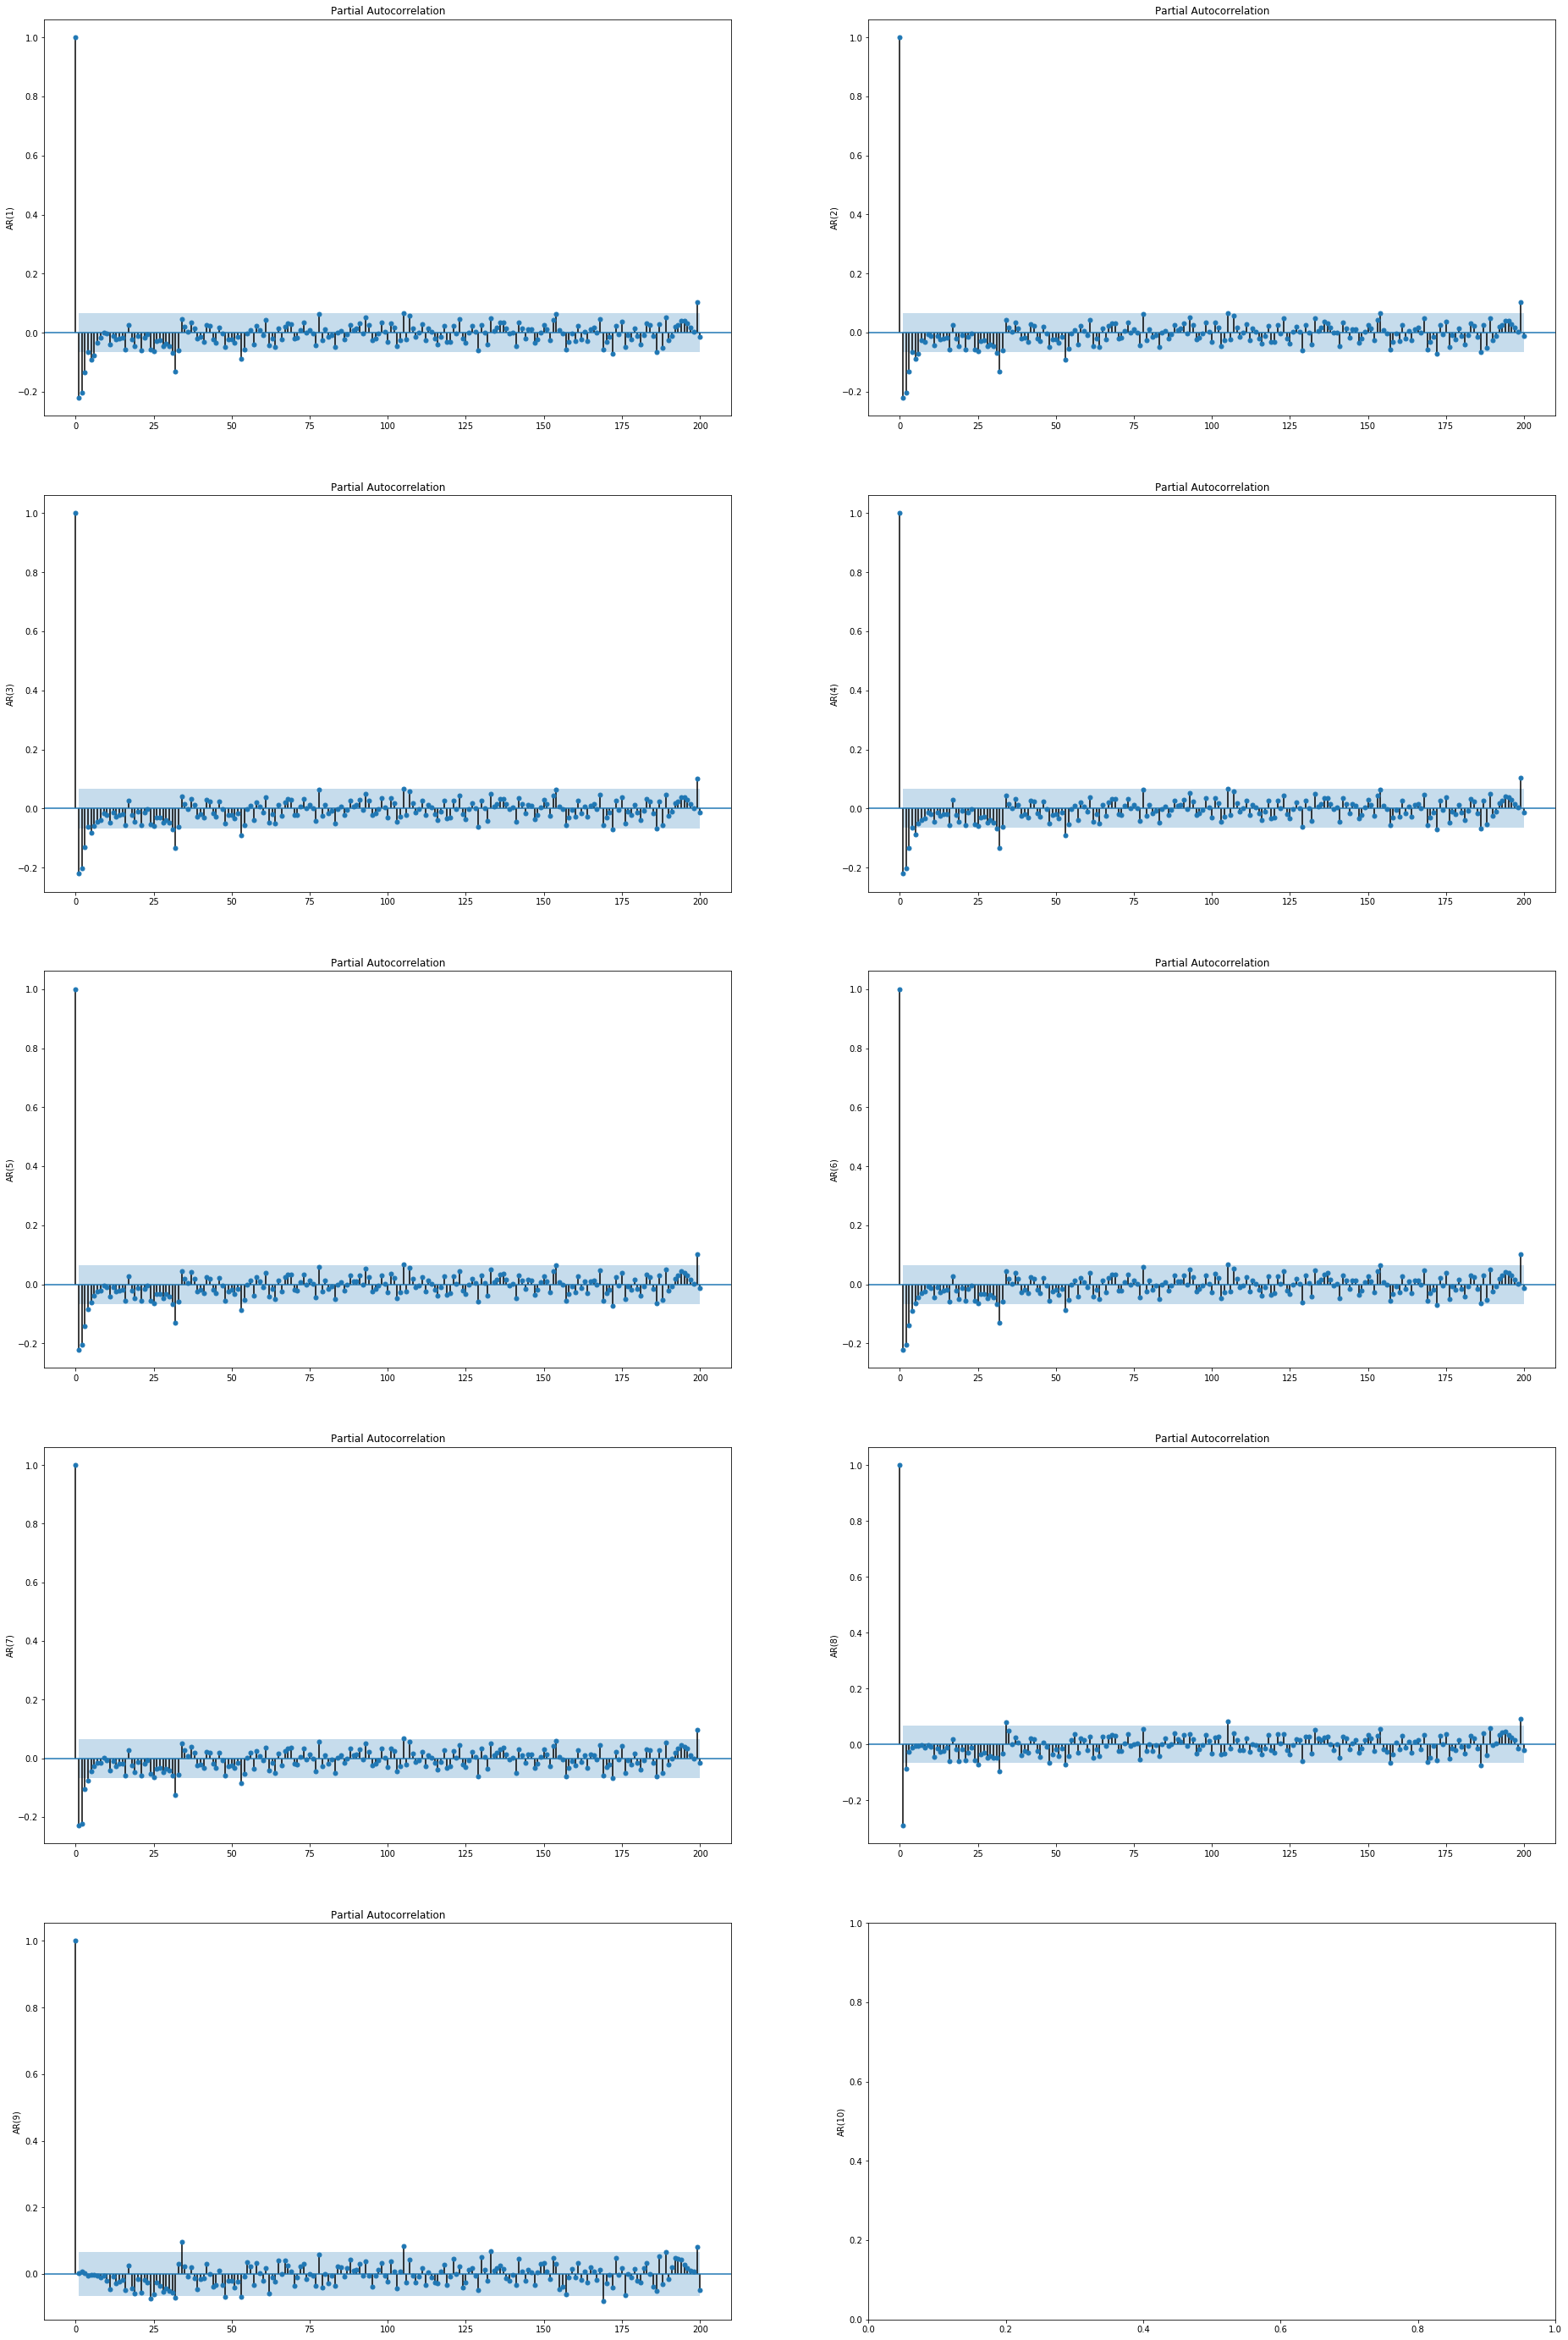

In [272]:
try:
    ACF_AR_Q(10, 5, 2)
except IndexError:
    print('-' * 115)

Количество значимых факторов и минимальное количество факторов обеспечивающих отсутствие автокорреляции - совпадает(!)

##### 4.4 Прогноз упреждением 30с

In [345]:
predicts = list( dP[-6:, 0] )
last_p = list()

for i in range(30):
    
    _pf = np.array([predicts])[0, -6:]
    _pf = np.array([_pf])
    _pr = clf.predict(_pf)[0, 0]
    
    predicts.append(_pr)

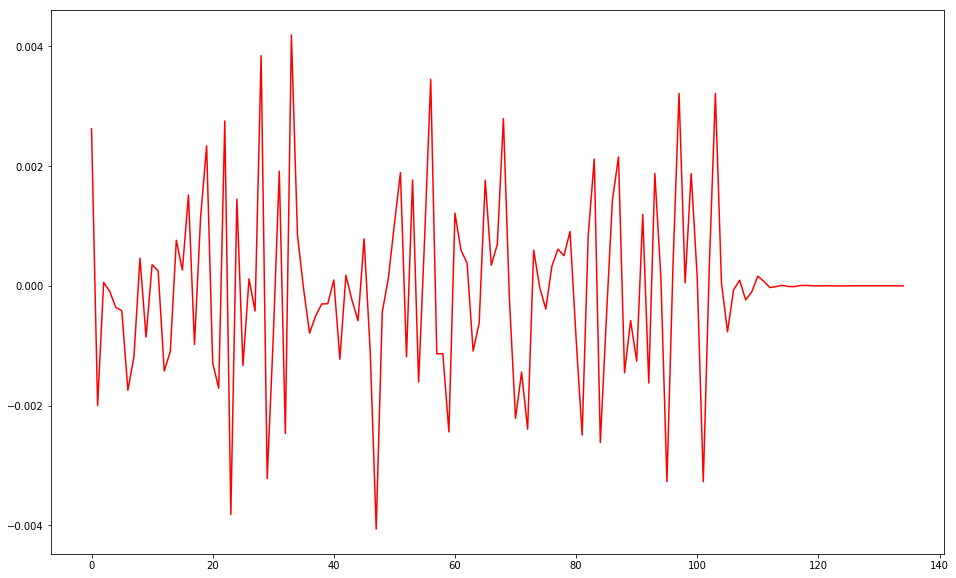

In [349]:
plt.figure(figsize=(16, 10))
plt.plot((list(dP) + predicts)[800:], 'r')
plt.show()

In [351]:
a = clf.coef_[0]

In [363]:
alphas = [1]
for i in range(30):
    alpha = 0
    if i > 0:
        for k in range(min(6, i)):
            alpha += a[k] * alphas[i - k - 1]
#             print(alpha, k, i - k - 1)
        alphas.append(alpha)

In [366]:
d_k = 0
for i in range(len(alphas)):
    d_k = math.pow(alphas[i], 2)
d_k *= 1

In [370]:
def conf_int(alpha):
    return ( -t.ppf(1 - alpha / 2, df=30 - 2) * math.sqrt(d_k), t.ppf(1 - alpha / 2, df=30 - 2) * math.sqrt(d_k) )

In [385]:
alpha = 0.05
intervals = np.array([ [ conf_int(alpha)[0] + _pred, conf_int(alpha)[1] + _pred ] for _pred in predicts ])

##### Прогноз + доверительный интервал

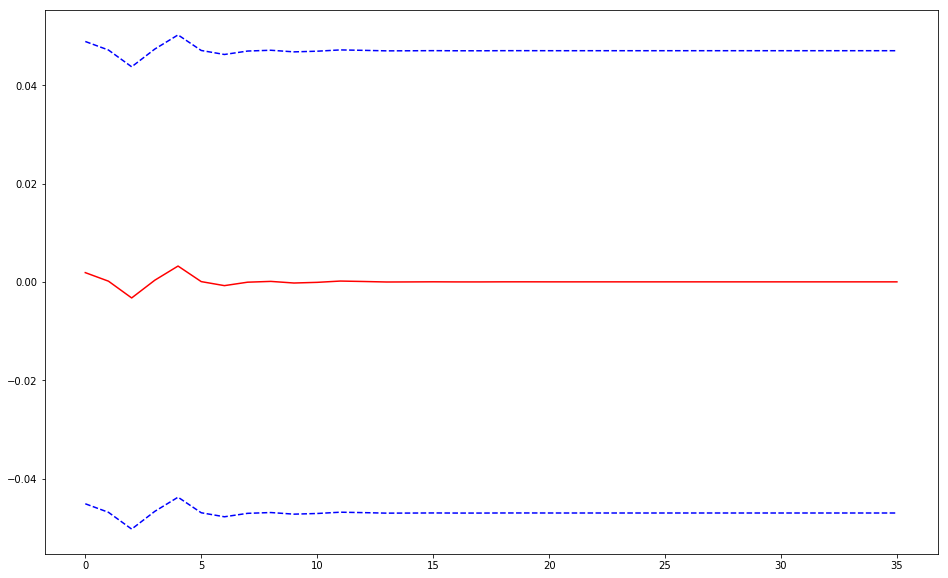

In [384]:
plt.figure(figsize=(16, 10))
plt.plot((list(dP) + predicts)[899:], 'r')
plt.plot(intervals[:, 0], '--b')
plt.plot(intervals[:, 1], '--b')
plt.show()